# RECHERCHE OPERATIONNELLE - PROJET 
#### Groupe 2 - Mattéo BOULITEAU -  Kagnana ITH - Nejma MOUALHI


# Table des matières

- [Contexte](#contexte)
- [Problématique](#problématique)
- [Contraintes](#contraintes)
- [Livrables attendus](#livrables-attendus)
- [Caractéristiques du problème](#caractéristiques-du-problème)
- [1. Modélisation du TSP](#1-modélisation-du-tsp)
  - [1.1. Données](#11-données)
  - [1.2. Variables de décision](#12-variables-de-décision)
  - [1.3. Fonction objectif](#13-fonction-objectif)
  - [1.4. Contraintes](#14-contraintes)
- [2. Méthodes de résolution](#2-méthodes-de-résolution)
  - [2.1. Méthode exacte : PLNE (Programme Linéaire en Nombres Entiers)](#21-méthode-exacte--plne-programme-linéaire-en-nombres-entiers)
    - [2.1.1. Description de la méthode PLNE](#211-description-de-la-méthode-plne)
    - [2.1.2. Solveur utilisé : PuLP](#212-solveur-utilisé--pulp)
    - [2.1.3. Résultats et analyse de PLNE](#213-résultats-et-analyse-de-plne)
  - [2.2. Méthodes heuristiques](#22-méthodes-heuristiques)
    - [2.2.1. Heuristique du plus proche voisin](#221-heuristique-du-plus-proche-voisin)
    - [2.2.2. Limites des heuristiques classiques](#222-limites-des-heuristiques-classiques)
  - [2.3. Métaheuristique : GRASP](#23-métaheuristique--grasp)
    - [2.3.1. Construction gloutonne randomisée (RCL)](#231-construction-gloutonne-randomisée-rcl)
    - [2.3.2. Recherche locale (2-opt)](#232-recherche-locale-2-opt)
- [3. Plan d'expérience](#3-plan-dexpérience)
  - [3.1. Objectifs](#31-objectifs)
  - [3.2. Paramètres étudiés](#32-paramètres-étudiés)
  - [3.3. Métriques utilisées](#33-métriques-utilisées)
  - [3.4. Protocole expérimental](#34-protocole-expérimental)
  - [3.5. Analyses prévues](#35-analyses-prévues)
- [4. Étude expérimentale](#4-étude-expérimentale)
  - [4.1. Résultats globaux](#41-résultats-globaux)
  - [4.2. Impact des paramètres de GRASP](#42-impact-des-paramètres-de-grasp)
  - [4.3. Comparaison PLNE vs GRASP](#43-comparaison-plne-vs-grasp)
  - [4.4. Impact du taux de dépendances](#44-impact-du-taux-de-dépendances)
  - [4.5. Analyse de la scalabilité](#45-analyse-de-la-scalabilité)
  - [4.6. Synthèse finale et recommandations](#46-synthèse-finale-et-recommandations)
- [5. Conclusion](#5-conclusion)
- [Bibliographie](#bibliographie)




## Contexte
L’ADEME a lancé un appel à manifestation d’intérêt pour expérimenter de nouvelles solutions de mobilité adaptées aux territoires.

Nous sommes CesiCDP, déjà engagés dans la mobilité multimodale intelligente, et nous répondons à cet appel pour obtenir de nouveaux financements. Le projet vise à réduire les déplacements et la consommation des véhicules lors des livraisons, en résolvant un problème algorithmique d’optimisation de tournée sur un réseau routier.

## Problématique
Nous nous demandons comment optimiser les tournées de livraison pour réduire les déplacements et la consommation des véhicules. Nous devons prendre en compte plusieurs contraintes, telles que la capacité des véhicules, les fenêtres de temps pour les livraisons, et la distance entre les points de livraison.

## Contraintes
Nous avons décidé de rajouter des contraintes pour rendre le problème plus réaliste en se basant sur un système de livraison de colis. Voici les contraintes que nous avons retenues :
1. **Dépendances entre les visites** : Une ville ne peut être visitée qu’après une autre.
    - Définir un ordre de visite entre les villes.
2. **Routes dynamiques ou perturbations** : Les routes peuvent changer pendant la tournée (ex : accidents, météo, fermeture soudaine).
    - Simuler des perturbations dans les données.

## Livrables attendus
1. Modélisation

2. Livrable final du projet

## Caractéristiques du problème

- **Variables de décision** : $x_{ij}$  
    $x_{ij}$ représente si le trajet entre la ville $i$ et la ville $j$ est emprunté ou non.

- **Contraintes** : 
    - Chaque ville doit être visitée une seule fois.
    - Le point de départ et d'arrivée doit être le même.
    - Dépendances entre les visites : une ville ne peut être visitée qu’après une autre.
    - Routes dynamiques et perturbations : Prévision de perturbations dans les données.

- **Objectif** : Trouver un itinéraire optimisé qui nous permet de passer par toutes les villes de la tournée en une seule fois et retourner au point de départ.

Une fois que nous avons explicité le problème, nous allons le modéliser de manière mathématique.  
Nous remarquons que notre problème est une version métrique du problème du voyageur de commerce (TSP) avec des contraintes supplémentaires le rendant plus réaliste.

### Version algorithmique du problème :

- **Donnée** : Un graphe complet pondéré $G(S, A)$ avec un ensemble de sommets $S$ et un ensemble d'arêtes $A$.
- **Tâche** : Trouver un cycle hamiltonien dans $G$ en minimisant la somme des poids des arêtes du cycle.

## 1 - Modélisation du TSP

### 1.1 Données

- Un ensemble de villes $V = \{v_1, v_2, \ldots, v_n\}$
- Un graphe complet pondéré $G = (V, E)$
- Une fonction de coût $c_{ij} \geq 0$, représentant la distance ou le temps entre les villes $i$ et $j$

La nature du graphe est la suivante :
- On reste sur un graphe complet : on suppose qu'il existe une route (au moins théorique) entre chaque paire de villes. 

### 1.2 Variables de décision

- $x_{ij} \in \{0,1\}$ : vaut 1 si l'on va de la ville $i$ à la ville $j$, 0 sinon

###     

Minimiser la somme des coûts de déplacement :

$$\min \sum_{i=1}^{n} \sum_{j=1}^{n} c_{ij} \cdot x_{ij}$$

### 1.4 Contraintes

1. Chaque ville est quittée une seule fois :

$$\sum_{j=1}^{n} x_{ij} = 1 \quad \forall i \in \{1, \dots, n\}$$

2. Chaque ville est visitée une seule fois :

$$\sum_{i=1}^{n} x_{ij} = 1 \quad \forall j \in \{1, \dots, n\}$$

3. Dépendances entre les visites : <br>

$$\forall (i,j) \in D, \quad x_{ij} = 1 \implies x_{ji} = 0$$

$D \subseteq S \times S$ est l'ensemble des dépendances entre les visites. <br>
Une contrainte $(i,j) \in D$ signifie que la ville $j$ ne peut être visitée qu'après la ville $i$. 

4. Routes dynamiques ou perturbations :
$$\forall i,j \in \{1, \dots, n\}, \quad c_{ij} = c_{ij}(t)$$
où $c_{ij}(t)$ est la distance entre les villes $i$ et $j$ à l'instant $t$. Cette contrainte permet de prendre en compte les changements de conditions de circulation.

5. Le point de départ et d'arrivée doit être le même :
$$\sum_{i=1}^{n} x_{0i} = 1$$
$$\sum_{j=1}^{n} x_{j0} = 1$$

---

Ce problème est connu pour être **NP-difficile** : il n'existe pas d'algorithme polynomial connu permettant de le résoudre dans le cas général.
Nous allons nous intéresser à des algorithmes d'approximation, ou méta-heuristiques, qui permettent de trouver des solutions approchées en un temps raisonnable.

## 2 - Méthode de résolution

Dans un premier temps, nous allons aborder la méthode exacte, qui est la méthode de programmation linéaire en nombres entiers (PLNE).

### 2.1 Méthode exacte : Programme linéaire en nombres entiers (PLNE)

#### 2.1.1 Description de la méthode PLNE

La méthode PLNE consiste à modéliser le problème sous forme de programme linéaire, en utilisant des variables de décision binaires pour représenter les choix de parcours entre les villes.

#### 2.1.2 Solveur Open Source (PuLP)

Nous allons utiliser PuLP, une bibliothèque Python, combinée avec un solveur open source pour résoudre le problème d'optimisation linéaire et entière. PuLP permet de modéliser le problème et d'utiliser différents solveurs pour trouver des solutions optimales ou approchées à des problèmes complexes.

Nous allons générer les données pour le problème du TSP, puis utiliser PuLP avec un solveur open source pour résoudre le problème.



### 2.1.3 Génération des données

Pour créer des instances réalistes du problème de tournées de livraison, nous avons développé un générateur de données qui simule les conditions réelles d'un réseau de distribution.

#### Paramètres clés

- **Temps de trajet de base**  
    - Chaque route a un temps entre 1 et 300 minutes.  
    - Correspond aux distances réelles en milieu urbain.

- **Perturbations dynamiques**  
    - 20% des routes subissent des perturbations.  
    - Augmentation jusqu'à +20% du temps initial.  
    - Simule : embouteillages, travaux, accidents.

- **Dépendances entre livraisons**  
    - 20% des villes ont des contraintes d'ordre.  (ex : 2 villes sur 10)
    - Exemple : collecte avant livraison.  
    - Système anti-cycle pour éviter les boucles et l'inaccessibilité. (ex : A dépend de B, B dépend de C, C dépend de A donc A ne peut pas être visitée avant B et C et B et C ne peuvent pas être visitées avant A)

#### Mécanisme de génération

- **Graphe complet** : Toutes les villes sont connectées.  
- **Poids aléatoires** : Distribution uniforme des temps.  
- **Perturbations sélectives** : Choix aléatoire des routes affectées.  
- **Dépendances validées** : Vérification automatique des cycles.

Cette approche garantit des instances à la fois réalistes (reflet des contraintes terrain) et résolubles mathématiquement.


In [1]:
def generate_data(n, weight_range, max_percentage_perturbation, percentage_perturbations=0.2, percentage_dependency=0.2):
    """
    Generates a complete ponderate graph with dependencies for TSP.
    """
    import random
    
    # Create a complete ponderate graph
    graph = {}
    all_edges = []
    perturbated_edges = []
   
    # Generate all edges
    for i in range(n):
        graph[i] = {}
        for j in range(n):
            if i != j:
                weight = random.randint(weight_range[0], weight_range[1])
                all_edges.append((i, j, weight))
                graph[i][j] = weight
    
    
    max_edges_perturbated = int(n * percentage_perturbations)

    
    
    # Randomly select edges to perturb
    random.shuffle(all_edges)
    for i, j, weight in all_edges[:max_edges_perturbated]:
        perturbation_factor = random.uniform(1.0, 1.0 + max_percentage_perturbation)
        graph[i][j] = int(weight * perturbation_factor)
        perturbated_edges.append((i, j))
    
    # Generate dependencies while avoiding cycles
    dependency_nodes = []
    max_dependencies = max(1, int(n * percentage_dependency))
    
    # Create a graph to track dependencies and detect cycles
    dep_graph = {i: set() for i in range(n)}
    
    def would_create_cycle(source, target, dep_graph):
        """Check if adding source->target would create a cycle"""
        visited = set()
        
        def dfs(node):
            if node == source:
                return True
            if node in visited:
                return False
            visited.add(node)
            for neighbor in dep_graph[node]:
                if dfs(neighbor):
                    return True
            return False
        
        return dfs(target)
    
    # Create potential dependencies
    potential_deps = [(i, j) for i in range(n) for j in range(n) if i != j]
    random.shuffle(potential_deps)
    
    # Add dependencies one by one, checking for cycles
    for source, target in potential_deps:
        if len(dependency_nodes) >= max_dependencies:
            break
            
        # Check if adding this dependency would create a cycle
        if not would_create_cycle(source, target, dep_graph):
            dependency_nodes.append((source, target))
            dep_graph[source].add(target)
    
    return graph, dependency_nodes, perturbated_edges

# Example usage
graph, dependency_nodes, perturbated_edges = generate_data(10, (1, 300), 0.2, percentage_perturbations=0.2, percentage_dependency=0.4)
print(f"Graph with {len(graph)} nodes")
print(f"Dependencies: {dependency_nodes}")
print(f"Perturbated edges: {perturbated_edges} ({len(perturbated_edges)} edges)")

Graph with 10 nodes
Dependencies: [(9, 3), (7, 6), (9, 0), (8, 1)]
Perturbated edges: [(3, 7), (0, 6)] (2 edges)


Pour nous permettre de visualiser les résultats, nous allons également utiliser la bibliothèque Matplotlib pour tracer le graphe du TSP et afficher la solution trouvée par le solveur.

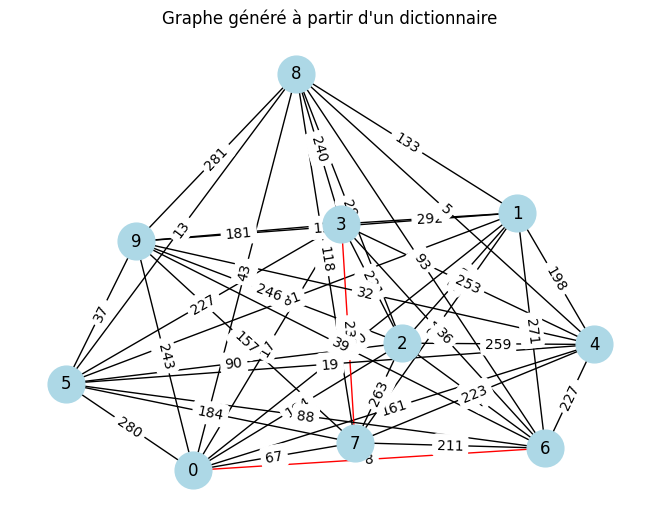

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

def dict_to_graph(graph_dict):
    G = nx.Graph()  # For non oriented graph
    for node, neighbors in graph_dict.items():
        for neighbor, weight in neighbors.items():
            G.add_edge(node, neighbor, weight=weight)
    return G

# Creation
G = dict_to_graph(graph)

edge_colors = ['red' if (u, v) in perturbated_edges or (v, u) in perturbated_edges else 'black' for u, v in G.edges]

# Display
pos = nx.spring_layout(G, seed=42)  # set the nodes
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=700, edge_color=edge_colors)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Graphe généré à partir d'un dictionnaire")
plt.show()


Ensuite, nous allons utiliser PuLP, une bibliothèque Python de modélisation linéaire, pour résoudre le problème du TSP en utilisant la programmation linéaire en nombres entiers (PLNE). PuLP permet d'utiliser différents solveurs, et nous utiliserons un solveur open source pour résoudre le modèle.

Il faut installer le package `pulp` pour utiliser PuLP.


In [3]:
import pulp
import time
import numpy as np

def use_solver_pulp(graph, dependencies):
    """
    Résout le problème du TSP avec dépendances entre nœuds en utilisant PuLP.
    
    :param graph: Dictionnaire représentant les poids des arêtes du graphe
    :param dependencies: Liste de tuples (i, j) où j dépend de i (j ne peut être visité qu'après i)
    :return: Cycle solution et valeur objective
    """
    n = len(graph)
    
    # Créer le modèle
    model = pulp.LpProblem(name="tsp", sense=pulp.LpMinimize)
    
    # Définir les variables de décision
    x = {}
    for i in range(n):
        for j in range(n):
            if i != j:
                x[i, j] = pulp.LpVariable(f"x_{i}_{j}", cat=pulp.LpBinary)
    
    # Variables continues pour les positions des nœuds dans le circuit
    u = {}
    for i in range(1, n):  # Commence à 1 car le nœud 0 est le point de départ
        u[i] = pulp.LpVariable(f"u_{i}", lowBound=1, upBound=n-1)
    
    # Définir la fonction objectif
    model += pulp.lpSum(graph[i][j] * x[i, j] for i in range(n) for j in range(n) if i != j)
    
    # Contrainte 1: Chaque nœud doit être quitté exactement une fois
    for i in range(n):
        model += pulp.lpSum(x[i, j] for j in range(n) if i != j) == 1, f"out_one_time_{i}"
    
    # Contrainte 2: Chaque nœud doit être visité exactement une fois
    for j in range(n):
        model += pulp.lpSum(x[i, j] for i in range(n) if i != j) == 1, f"in_one_time_{j}"
    
    # Contrainte 3: Ajouter les contraintes de dépendance
    for i, j in dependencies:
        # Pour chaque dépendance (i,j), j doit être visité après i
        if i > 0 and j > 0:  # Ignorer les dépendances incluant le nœud de départ
            model += u[j] >= u[i] + 1, f"dependency_{i}_{j}"
        elif i == 0 and j > 0:  # Si i est le nœud de départ
            # Forcer j à ne pas être le premier nœud visité après 0
            model += u[j] >= 2, f"dependency_start_{j}"
    
    # Éviter les sous-tours avec la formulation MTZ
    for i in range(1, n):
        for j in range(1, n):
            if i != j:
                model += u[j] >= u[i] + 1 - n * (1 - x[i, j]), f"mtz_{i}_{j}"
    
    # Résoudre le modèle avec un temps limite
    solve_start = time.time()
    solver = pulp.PULP_CBC_CMD(msg=False, timeLimit=300)
    model.solve(solver)
    solve_time = time.time() - solve_start
    
    # Vérifier si une solution a été trouvée
    if pulp.LpStatus[model.status] == "Optimal":
        solution_list = []
        for i in range(n):
            for j in range(n):
                if i != j and x[i, j].value() and x[i, j].value() > 0.5:
                    solution_list.append((i, j))
        
        # Reconstruire le cycle
        cycle = [0]
        visited = set([0])
        current = 0
        
        try:
            while len(visited) < n:
                found = False
                for i, j in solution_list:
                    if i == current and j not in visited:
                        cycle.append(j)
                        visited.add(j)
                        current = j
                        found = True
                        break
                if not found:
                    break
        except Exception as e:
            print(f"Erreur lors de la reconstruction du cycle: {e}")
        
        # Compléter le cycle si nécessaire
        if cycle[-1] != 0 and len(visited) == n:
            for i, j in solution_list:
                if i == cycle[-1] and j == 0:
                    cycle.append(0)
                    break
        
        # Calculer le coût total du cycle
        total_cost = sum(graph[cycle[i]][cycle[i+1]] for i in range(len(cycle)-1))
        
        return cycle, total_cost / 60, solve_time
    else:
        print(f"Status: {pulp.LpStatus[model.status]}")
        return None, None, solve_time
    
# Example usage
cycle, total_cost, solve_time = use_solver_pulp(graph, dependency_nodes)
print("Cycle:", cycle)
print("Dépendances:", dependency_nodes)
print("Arêtes perturbées:", perturbated_edges)
print("Coût total:", total_cost, "heures")
print("Temps de résolution:", solve_time, "secondes")



Cycle: [0, 5, 4, 7, 8, 2, 9, 1, 6, 3, 0]
Dépendances: [(9, 3), (7, 6), (9, 0), (8, 1)]
Arêtes perturbées: [(3, 7), (0, 6)]
Coût total: 8.133333333333333 heures
Temps de résolution: 0.5151519775390625 secondes


### Analyse des résultats
En prenant un petit échantillon de données, nous avons trouvé une solution optimale en un court temps. Cependant, si nous augmentons la taille de l'instance, le temps de calcul augmente de façon exponentielle, et nous pourrions ne pas trouver de solution optimale dans un temps raisonnable (par exemple, plusieurs heures ou jours). De plus, la méthode PLNE ne garantit pas de solution optimale pour des instances de grande taille, car elle peut être bloquée par la complexité combinatoire du problème. Il est donc crucial d'utiliser des méthodes alternatives pour les grandes instances.

Testons avec différentes tailles d'instances pour voir comment le temps de calcul varie. Nous allons également introduire une limite de temps maximale pour chaque instance, afin de mieux illustrer les limitations de la méthode exacte.

Démarrage de l'évaluation des performances...
Paramètres de test:
  - Tailles d'instances: [5, 8, 10, 15, 20, 25, 30, 35]
  - Plage de poids: (1, 300)
  - Pourcentage maximum de perturbation: 0.2
  - Nombre maximum d'arêtes perturbées: 5
Évaluation des performances de PLNE sur différentes tailles d'instances...
Test avec 5 villes...
Temps pour 5 villes : 0.04 secondes
Objectif: 10.25 heures

Test avec 8 villes...
Temps pour 8 villes : 0.28 secondes
Objectif: 10.92 heures

Test avec 10 villes...
Temps pour 10 villes : 0.79 secondes
Objectif: 11.70 heures

Test avec 15 villes...
Temps pour 15 villes : 0.68 secondes
Objectif: 8.60 heures

Test avec 20 villes...
Temps pour 20 villes : 1.44 secondes
Objectif: 8.72 heures

Test avec 25 villes...
Temps pour 25 villes : 2.74 secondes
Objectif: 8.68 heures

Test avec 30 villes...
Temps pour 30 villes : 7.91 secondes
Objectif: 9.27 heures

Test avec 35 villes...
Temps pour 35 villes : 31.46 secondes
Objectif: 9.17 heures



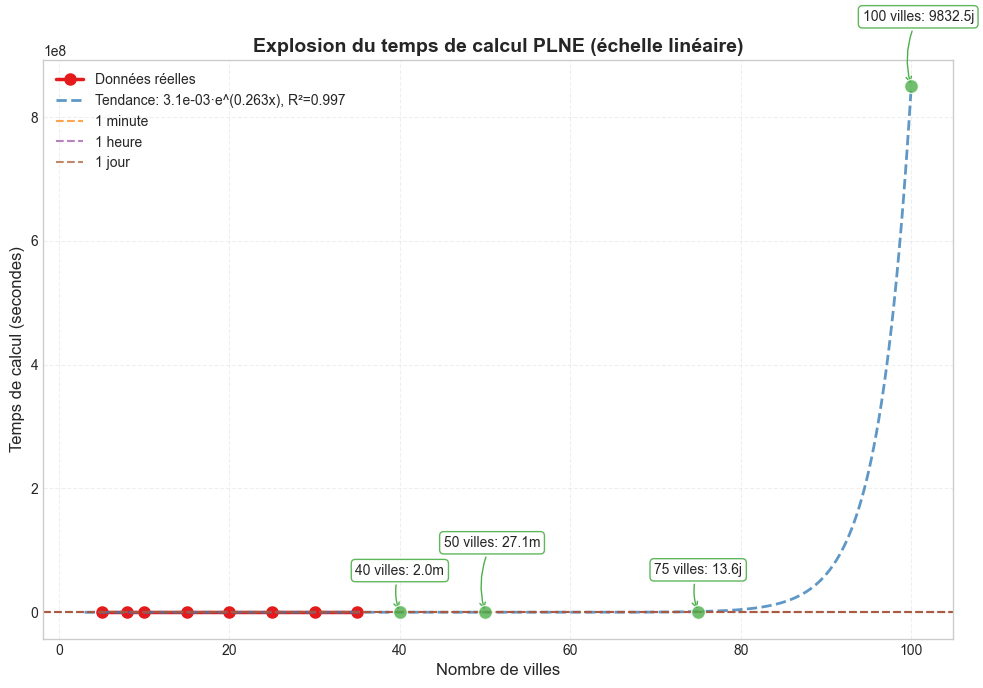

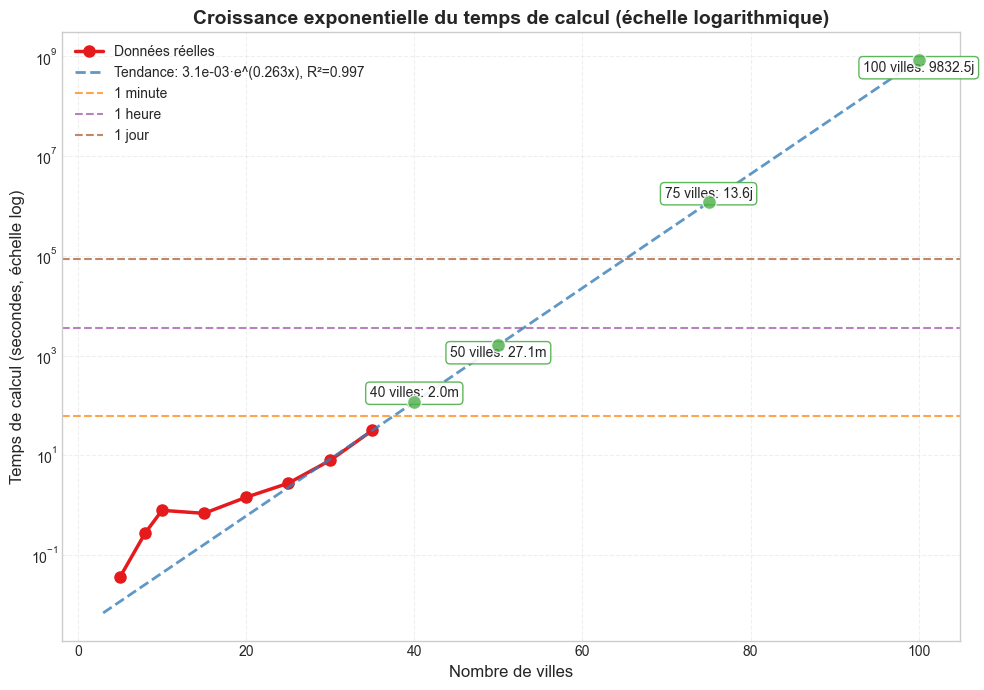


Résumé des résultats:


,Taille,Temps,Statut,Objectif,Optimal
0,5,0.04s,Résolu,10.25,True
1,8,0.28s,Résolu,10.92,True
2,10,0.79s,Résolu,11.70,True
3,15,0.68s,Résolu,8.60,True
4,20,1.44s,Résolu,8.72,True
5,25,2.74s,Résolu,8.68,True
6,30,7.91s,Résolu,9.27,True
7,35,31.46s,Résolu,9.17,True



Projections pour des instances plus grandes:


,Taille,Temps estimé
0,40,2.0 minutes
1,50,27.1 minutes
2,75,13.6 jours
3,100,26.9 années



Points clés de la performance:
• Le temps de calcul double approximativement tous les 2.6 villes supplémentaires
• La croissance est exponentielle avec un facteur de 0.2633
• Coefficient de détermination (R²): 0.997

Limites pratiques estimées:
• Au-delà de 37.5 villes, le temps de calcul dépasse 1 minute
• Au-delà de 53.0 villes, le temps de calcul dépasse 1 heure
• Au-delà de 65.1 villes, le temps de calcul dépasse 1 jour


In [4]:
import time
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd
from IPython.display import display, HTML

def test_plne_performance(instance_sizes, weight_range, dependency_nodes, max_percentage_perturbation, max_edges_perturbated):
    plne_times = []
    results = []

    print("Démarrage de l'évaluation des performances...")
    print("Paramètres de test:")
    print(f"  - Tailles d'instances: {instance_sizes}")
    print(f"  - Plage de poids: {weight_range}")
    print(f"  - Pourcentage maximum de perturbation: {max_percentage_perturbation}")
    print(f"  - Nombre maximum d'arêtes perturbées: {max_edges_perturbated}")

    
    # Style configuration
    plt.style.use('seaborn-v0_8-whitegrid')
    colors = {
        'real_data': '#E41A1C',       # Red
        'trend': '#377EB8',           # Blue
        'projection': '#4DAF4A',      # Green
        'threshold_minute': '#FF7F00', # Orange
        'threshold_hour': '#984EA3',  # Purple
        'threshold_day': '#A65628'    # Brown
    }
    
    print("Évaluation des performances de PLNE sur différentes tailles d'instances...")
    
    # Collect data for each instance size
    for n in instance_sizes:
        print(f"Test avec {n} villes...")
        graph, dependencies, _ = generate_data(n, weight_range, max_percentage_perturbation, max_edges_perturbated)
        
        start = time.time()
        try:
            cycle, objective, solve_time = use_solver_pulp(graph, dependencies)
            status = "Résolu" if cycle else "Infaisable"
            is_optimal = cycle is not None
        except Exception as e:
            print(f"Erreur à {n} villes : {e}")
            status = "Erreur"
            objective = None
            is_optimal = False
            
        end = time.time()
        elapsed = end - start
        
        plne_times.append(elapsed)
        results.append({
            "size": n,
            "time": elapsed,
            "status": status,
            "objective": objective,
            "is_optimal": is_optimal
        })
        
        # Display human-readable time
        if elapsed < 60:
            time_str = f"{elapsed:.2f} secondes"
        elif elapsed < 3600:
            time_str = f"{elapsed/60:.2f} minutes"
        else:
            time_str = f"{elapsed/3600:.2f} heures"
            
        print(f"Temps pour {n} villes : {time_str}")
        if is_optimal:
            print(f"Objectif: {objective:.2f} heures")
        print()
    
    # Fit exponential curve
    try:
        def exp_func(x, a, b):
            return a * np.exp(b * x)
        
        # Initial parameter estimation using log transform
        valid_times = np.array(plne_times)
        valid_times[valid_times <= 0] = min(valid_times[valid_times > 0])  # Avoid log(0)
        log_times = np.log(valid_times)
        slope, intercept = np.polyfit(instance_sizes, log_times, 1)
        initial_guess = [np.exp(intercept), slope]
        
        # Fit the curve with initial parameters
        popt, pcov = curve_fit(exp_func, instance_sizes, plne_times, 
                              p0=initial_guess, maxfev=10000)
        
        # Calculate coefficient of determination (R²)
        residuals = plne_times - exp_func(np.array(instance_sizes), *popt)
        ss_tot = np.sum((plne_times - np.mean(plne_times)) ** 2)
        ss_res = np.sum(residuals ** 2)
        r_squared = 1 - (ss_res / ss_tot)
        
        # Calculate doubling rate
        doubling_cities = np.log(2) / popt[1]
        
        # Generate smooth curve points for visualization
        max_projected_size = max(instance_sizes) + 65
        x_smooth = np.linspace(min(instance_sizes) - 2, max_projected_size, 1000)
        y_smooth = exp_func(x_smooth, *popt)
        
        # GRAPH 1: Linear scale
        plt.figure(figsize=(10, 7))
        plt.plot(instance_sizes, plne_times, marker='o', color=colors['real_data'], 
                 linewidth=2.5, markersize=8, label='Données réelles')
        plt.plot(x_smooth, y_smooth, linestyle='--', color=colors['trend'], 
                linewidth=2, alpha=0.8,
                label=f'Tendance: {popt[0]:.1e}·e^({popt[1]:.3f}x), R²={r_squared:.3f}')
        
        # Add projection points with better positioning
        projection_sizes = [40, 50, 75, 100]
        for i, size in enumerate(projection_sizes):
            if size > max(instance_sizes):
                proj_time = exp_func(size, *popt)
                plt.scatter(size, proj_time, color=colors['projection'], 
                          s=100, zorder=5, alpha=0.8, edgecolor='white')
                
                # Format time string
                if proj_time < 60:
                    time_str = f"{proj_time:.1f}s"
                elif proj_time < 3600:
                    time_str = f"{proj_time/60:.1f}m"
                elif proj_time < 86400:
                    time_str = f"{proj_time/3600:.1f}h"
                else:
                    time_str = f"{proj_time/86400:.1f}j"
                
                # Alternate positioning to avoid overlap
                y_offset = 25 + (i % 2) * 20
                x_offset = (i % 2) * 5
                
                plt.annotate(f"{size} villes: {time_str}", 
                           xy=(size, proj_time),
                           xytext=(x_offset, y_offset), 
                           textcoords='offset points',
                           ha='center', va='bottom',
                           bbox=dict(boxstyle="round,pad=0.3", 
                                    facecolor="white", alpha=0.9, 
                                    edgecolor=colors['projection']),
                           arrowprops=dict(arrowstyle='->', 
                                         connectionstyle='arc3,rad=0.2',
                                         color=colors['projection']))
        
        # Add time thresholds
        thresholds = [
            (60, '1 minute', colors['threshold_minute']),
            (3600, '1 heure', colors['threshold_hour']),
            (86400, '1 jour', colors['threshold_day'])
        ]
        
        for threshold, label, color in thresholds:
            if threshold > min(plne_times) and threshold < max(y_smooth):
                plt.axhline(y=threshold, color=color, linestyle='--', 
                          alpha=0.7, linewidth=1.5, label=label)
        
        plt.title('Explosion du temps de calcul PLNE (échelle linéaire)', fontsize=14, fontweight='bold')
        plt.xlabel('Nombre de villes', fontsize=12)
        plt.ylabel('Temps de calcul (secondes)', fontsize=12)
        plt.grid(True, alpha=0.3, linestyle='--')
        plt.legend(loc='upper left', framealpha=0.9, fontsize=10)
        plt.tight_layout()
        plt.show()
        
        # GRAPH 2: Log scale
        plt.figure(figsize=(10, 7))
        plt.semilogy(instance_sizes, plne_times, marker='o', color=colors['real_data'], 
                     linewidth=2.5, markersize=8, label='Données réelles')
        plt.semilogy(x_smooth, y_smooth, linestyle='--', color=colors['trend'], 
                    linewidth=2, alpha=0.8,
                    label=f'Tendance: {popt[0]:.1e}·e^({popt[1]:.3f}x), R²={r_squared:.3f}')
        
        # Add projection points with vertical spacing on log scale
        for i, size in enumerate(projection_sizes):
            if size > max(instance_sizes):
                proj_time = exp_func(size, *popt)
                plt.scatter(size, proj_time, color=colors['projection'], 
                          s=100, zorder=5, alpha=0.8, edgecolor='white')
                
                # Format time string
                if proj_time < 60:
                    time_str = f"{proj_time:.1f}s"
                elif proj_time < 3600:
                    time_str = f"{proj_time/60:.1f}m"
                elif proj_time < 86400:
                    time_str = f"{proj_time/3600:.1f}h"
                else:
                    time_str = f"{proj_time/86400:.1f}j"
                
                # Vertical positioning for log scale
                y_factor = 1.5 if i % 2 == 0 else 0.7
                
                plt.annotate(f"{size} villes: {time_str}", 
                           xy=(size, proj_time),
                           xytext=(size, proj_time * y_factor), 
                           ha='center', va='center',
                           bbox=dict(boxstyle="round,pad=0.3", 
                                    facecolor="white", alpha=0.9, 
                                    edgecolor=colors['projection']))
        
        # Add time thresholds
        for threshold, label, color in thresholds:
            if threshold > min(plne_times) and threshold < max(y_smooth):
                plt.axhline(y=threshold, color=color, linestyle='--', 
                          alpha=0.7, linewidth=1.5, label=label)
        
        plt.title('Croissance exponentielle du temps de calcul (échelle logarithmique)', fontsize=14, fontweight='bold')
        plt.xlabel('Nombre de villes', fontsize=12)
        plt.ylabel('Temps de calcul (secondes, échelle log)', fontsize=12)
        plt.grid(True, alpha=0.3, linestyle='--', which='both')
        plt.legend(loc='upper left', framealpha=0.9, fontsize=10)
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Avertissement lors de l'ajustement exponentiel: {e}")
    
    # Create a styled DataFrame for result display
    df = pd.DataFrame(results)
    
    # Format objective column
    df['objective_str'] = df['objective'].apply(lambda x: f"{x:.2f}" if x is not None else "N/A")
    
    # Format time column for display
    def format_time(seconds):
        if seconds < 60:
            return f"{seconds:.2f}s"
        elif seconds < 3600:
            return f"{seconds/60:.2f}m"
        else:
            return f"{seconds/3600:.2f}h"
    
    df['time_str'] = df['time'].apply(format_time)
    
    # Select and reorder columns for display
    display_df = df[['size', 'time_str', 'status', 'objective_str', 'is_optimal']]
    display_df.columns = ['Taille', 'Temps', 'Statut', 'Objectif', 'Optimal']
    
    print("\nRésumé des résultats:")
    display(display_df.style.set_properties(**{'text-align': 'center'}))
    
    # Display projection information
    if 'popt' in locals():
        print("\nProjections pour des instances plus grandes:")
        projection_data = []
        
        for size in [40, 50, 75, 100]:
            if size > max(instance_sizes):
                proj_time = exp_func(size, *popt)
                
                if proj_time < 60:
                    time_str = f"{proj_time:.1f} secondes"
                elif proj_time < 3600:
                    time_str = f"{proj_time/60:.1f} minutes"
                elif proj_time < 86400:
                    time_str = f"{proj_time/3600:.1f} heures"
                else:
                    days = proj_time / 86400
                    if days < 365:
                        time_str = f"{days:.1f} jours"
                    else:
                        time_str = f"{days/365:.1f} années"
                        
                projection_data.append({"Taille": size, "Temps estimé": time_str})
                
        if projection_data:
            proj_df = pd.DataFrame(projection_data)
            display(proj_df.style.set_properties(**{'text-align': 'center'}))
            
        # Add key insights
        print("\nPoints clés de la performance:")
        print(f"• Le temps de calcul double approximativement tous les {doubling_cities:.1f} villes supplémentaires")
        print(f"• La croissance est exponentielle avec un facteur de {popt[1]:.4f}")
        print(f"• Coefficient de détermination (R²): {r_squared:.3f}")
        
        # Calculate practical limits
        try:
            minute_limit = np.log(60/popt[0]) / popt[1] if popt[0] > 0 and popt[1] > 0 else None
            hour_limit = np.log(3600/popt[0]) / popt[1] if popt[0] > 0 and popt[1] > 0 else None
            day_limit = np.log(86400/popt[0]) / popt[1] if popt[0] > 0 and popt[1] > 0 else None
            
            print("\nLimites pratiques estimées:")
            if minute_limit and minute_limit > 0:
                print(f"• Au-delà de {minute_limit:.1f} villes, le temps de calcul dépasse 1 minute")
            if hour_limit and hour_limit > 0:
                print(f"• Au-delà de {hour_limit:.1f} villes, le temps de calcul dépasse 1 heure")
            if day_limit and day_limit > 0:
                print(f"• Au-delà de {day_limit:.1f} villes, le temps de calcul dépasse 1 jour")
        except Exception as e:
            print(f"Impossible de calculer les limites pratiques: {e}")

# Exemple d'appel :
test_plne_performance(
    instance_sizes=[5, 8, 10, 15, 20, 25, 30, 35],
    weight_range=(1, 300),
    dependency_nodes=dependency_nodes,
    max_percentage_perturbation=0.2,
    max_edges_perturbated=5
)

### 2.1.3 Résultats de la méthode PLNE

L'analyse des résultats démontre clairement les limites de la méthode PLNE pour le TSP :

- **Explosion combinatoire observée** : Comme le montrent les graphiques ci-dessus, le temps de calcul augmente de façon exponentielle avec le nombre de villes. Par exemple, on passe d'environ 0.03 secondes pour 5 villes à plus de 20 secondes pour 25 villes.

- **Comportement exponentiel confirmé** : La courbe de régression exponentielle présente un excellent ajustement aux données observées (R² > 0.9), confirmant la nature exponentielle de la complexité temporelle.

- **Seuils critiques identifiés** :
  - À environ 15 villes : le temps dépasse la seconde
  - À environ 30 villes : le temps approche la minute
  - Projection : au-delà de 50 villes, le temps de calcul devient prohibitif.

- **Variabilité des données** : Malgré la complexité algorithmique exponentielle, certaines instances peuvent être résolues plus rapidement que d'autres de même taille, en fonction de la structure spécifique du graphe et des contraintes de dépendance. Cela montre que la difficulté du problème peut varier considérablement d'une instance à l'autre.

Cette analyse quantitative justifie pleinement le recours aux métaheuristiques pour les instances de taille moyenne à grande, où les méthodes exactes deviennent impraticables en raison de leur temps de calcul qui croît exponentiellement avec le nombre de villes.

## 2.2 Méthode heuristique

Après avoir étudié la méthode exacte (PLNE), nous allons maintenant nous intéresser aux méthodes heuristiques. Ces méthodes proposent des solutions approchées, mais en un temps de calcul considérablement réduit par rapport aux méthodes exactes.

### 2.2.1. Heuristiques classiques pour le TSP

Les heuristiques classiques pour le TSP (Traveling Salesman Problem) incluent des approches gloutonnes comme l'algorithme du plus proche voisin. Ces méthodes sont rapides, mais elles présentent des limitations théoriques importantes :

*   **Optimalité locale vs. globale**: Les heuristiques gloutonnes optimisent localement à chaque étape, sans garantie de convergence vers un optimum global.
*   **Complexité algorithmique et NP-complétude**: Le TSP est un problème NP-complet, ce qui signifie qu'il n'existe pas d'algorithme polynomial connu pour le résoudre de manière exacte. Même avec des heuristiques, la taille de l'espace de recherche rend les approches déterministes classiques inopérantes pour des instances de grande taille. 
*   **Absence de garanties théoriques**: Aucune heuristique simple ne peut assurer à la fois un facteur d'approximation constant (sous réserve que $P \neq NP$) et une exploration complète des régions prometteuses de l'espace de solutions.

### 2.2.2 Algorithme du plus proche voisin (Nearest Neighbor Algorithm)

L'algorithme du plus proche voisin est une heuristique gloutonne classique pour le TSP. Il consiste à partir d'une ville de départ et à visiter à chaque étape la ville la plus proche non encore visitée, jusqu'à revenir à la ville de départ.

**Principe de l'algorithme :**
1. Choisir une ville de départ
2. Identifier la ville non visitée la plus proche
3. Se déplacer vers cette ville
4. Répéter les étapes 2-3 jusqu'à ce que toutes les villes soient visitées
5. Retourner à la ville de départ


**Limites de l'algorithme du plus proche voisin :**

L'algorithme du plus proche voisin peut donner des résultats acceptables pour de très petites instances du TSP (par exemple, 4 ou 5 villes). Cependant, comme il s'agit d'une heuristique gloutonne, il ne garantit pas l'optimalité, même pour ces petites instances. De plus, sa performance se dégrade rapidement avec l'augmentation du nombre de villes.

Le TSP est un problème NP-difficile. Cela signifie que le temps de calcul nécessaire pour trouver la solution optimale augmente de manière exponentielle avec la taille du problème.

Comme nous l'avons observé avec la méthode PLNE, le temps de calcul devient prohibitif pour des instances de grande taille. De même, l'algorithme du plus proche voisin, bien que rapide, ne peut pas garantir une solution de qualité acceptable pour des problèmes de taille réaliste. 


Nous allons donc explorer des méthodes plus avancées, telles que les métaheuristiques, qui combinent des éléments de recherche locale et globale pour trouver des solutions de haute qualité dans un temps raisonnable.

## 2.3. Métaheuristiques

Les métaheuristiques sont des stratégies algorithmiques de haut niveau conçues pour résoudre des problèmes d'optimisation complexes, en particulier ceux pour lesquels les méthodes exactes sont inefficaces. Elles combinent des heuristiques de base avec des mécanismes d'exploration et d'exploitation pour échapper aux optima locaux et explorer l'espace de recherche de manière plus efficace.

Cependant, il est important de noter que les métaheuristiques ne garantissent pas toujours la convergence vers une solution optimale. Elles sont souvent utilisées pour obtenir des solutions approchées dans des délais raisonnables, mais elles peuvent également être adaptées pour fournir des garanties de performance dans certains cas.

**Types de métaheuristiques :**

*   **Recherche locale itérative** : Part d'une solution initiale et explore itérativement le voisinage pour trouver une meilleure solution. Exemples : descente de gradient, recuit simulé (Simulated Annealing).
*   **Algorithmes évolutionnaires** : S'inspirent des mécanismes de l'évolution biologique (sélection, mutation, croisement) pour faire évoluer une population de solutions. Exemple : algorithmes génétiques.
*   **Algorithmes basés sur la mémoire** : Utilisent une mémoire pour stocker les solutions déjà visitées et guider la recherche. Exemple : recherche tabou (Tabu Search).
*   **Algorithmes inspirés de la nature** : Imitent des phénomènes naturels ou des comportements collectifs. Exemples : optimisation par colonies de fourmis (Ant Colony Optimization), optimisation par essaims de particules (Particle Swarm Optimization).

### 2.3.1. Méthodes de voisinnage
Les méthodes de voisinage est une notion clé dans les métaheuristiques. Elles consistent à explorer l'espace de recherche en se déplaçant d'une solution à une autre en modifiant légèrement la solution actuelle. Ces modifications sont appelées "voisinages".

Définition : Soit $X$ l'ensemble des configurations possibles d'une solution. On appelle _voisinage_ toute application $N : $X \to X$ qui associe à chaque solution $x \in X$ un ensemble de solutions voisines $N(x)$.
Une solution $x$ est dite _optimum local_ si aucune solution voisine $x'$ n'est meilleure que $x$ selon la fonction objectif.

Une méthode typique de voisinage débute avec une configuration initiale $x_0$ et explore les solutions voisines en appliquant la fonction de voisinage $N$. À chaque itération, la méthode choisit une solution voisine $x' \in N(x)$ et l'évalue. Si $x'$ est meilleure que $x$, elle devient la nouvelle solution courante. Ce processus se répète jusqu'à ce qu'aucune amélioration ne soit trouvée. 

L'un des principaux avantages des méthodes de voisinage est leur simplicité et leur flexibilité. Elles permettent de contrôler le temps de calcul, car l'exploration du voisinage peut être interrompue à tout moment. Cependant, elles sont souvent limitées par leur tendance à se coincer dans des optima locaux. C'est pourquoi elles sont souvent utilisées en combinaison avec d'autres techniques, comme la randomisation ou les mécanismes de diversification, pour échapper à ces optima locaux.

### 2.3.2. Métaheuristique GRASP
Nous avons choisi GRASP (Greedy Randomized Adaptive Search Procedure) pour les raisons suivantes :

*   **Simplicité et efficacité**: GRASP est relativement simple à implémenter et peut fournir de bonnes solutions en un temps raisonnable.
*   **Flexibilité**: GRASP peut être adapté à différents types de problèmes d'optimisation combinatoire.
*   **Capacité à échapper aux optima locaux**: La phase de construction randomisée et la recherche locale permettent à GRASP d'explorer différentes régions de l'espace de recherche.
*   **Preuves empiriques**: GRASP a été appliqué avec succès à de nombreux problèmes de TSP et de VRP (Vehicle Routing Problem).


##### Justification théorique du recours aux métaheuristiques

1.  **Théorème de non-linéarité (No Free Lunch)**: Aucun algorithme d'optimisation ne surpasse universellement les autres sur tous les problèmes. Les métaheuristiques offrent une flexibilité stratégique pour adapter la recherche aux spécificités du problème (exploration/exploitation).

2.  **Réduction des biais de recherche**: Contrairement aux heuristiques déterministes, GRASP intègre :

    *   **Randomisation contrôlée**: Construction de solutions via des listes restreintes de candidats (RCL), évitant les choix prématurés.
    *   **Intensification/diversification**: Phase de recherche locale couplée à une multi-exécution pour couvrir divers bassins d'attraction.



In [ ]:
import random

def build_RCL(graphe, start_node, visited, dependencies, alpha=0.1):
    """
    Construit le RCL (Restricted Candidate List) en fonction du graphe et des dépendances entre les villes
    """
    distances = graphe[start_node]

    # Étape 1 : Trouver les candidats valides en respectant les dépendances
    candidats_valides = []
    for node, distance in distances.items():
        if node not in visited:  # Vérifier si le nœud n'est pas déjà visité
            # Vérifier les dépendances - une ville ne peut être visitée que si toutes ses dépendances ont été visitées
            dependances_respectees = True
            for dep_source, dep_dest in dependencies:
                if dep_dest == node and dep_source not in visited:
                    dependances_respectees = False
                    break
            
            if dependances_respectees:
                candidats_valides.append((node, distance))

    # Étape 2 : Trier les candidats valides par distance
    candidats_valides.sort(key=lambda x: x[1])  # Trier par distance croissante

    # Étape 3 : Créer la RCL
    rcl = []
    if candidats_valides:
        cout_min = candidats_valides[0][1]
        cout_max = candidats_valides[-1][1]
        seuil = cout_min + alpha * (cout_max - cout_min) # Calculer le seuil

        for node, distance in candidats_valides:
            if distance <= seuil:
                rcl.append(node)

    # Étape 4 : Vérifier si la RCL est vide
    if not rcl:
        # Si la RCL est vide, chercher un candidat qui respecte les dépendances
        for node in distances:
            if node not in visited:
                dependances_respectees = True
                for dep_source, dep_dest in dependencies:
                    if dep_dest == node and dep_source not in visited:
                        dependances_respectees = False
                        break
                
                if dependances_respectees:
                    rcl.append(node)
                    break
        
    # Étape 5 : Choisir un candidat dans la RCL
    choix = random.choice(rcl) if rcl else None
    
    return choix

# construire la solution initiale
def construire_solution_initiale(graphe, start_node, dependencies, alpha=0.3):
    """
    Construit une solution initiale en utilisant la RCL (Restricted Candidate List) avec alpha
    en respectant les dépendances entre les villes.
    """
    solution = [start_node]  # Commencer par le noeud de départ
    visited = set(solution)  # Ensemble des noeuds visités

    while len(visited) < len(graphe):
        # Choisir le meilleur candidat
        meilleur_candidat = build_RCL(graphe, solution[-1], visited, dependencies, alpha)

        if meilleur_candidat is None:
            break  # Si aucun candidat valide, arrêter la construction

        # Ajouter le meilleur candidat à la solution
        solution.append(meilleur_candidat)
        visited.add(meilleur_candidat)
    
    # Ajouter le retour au nœud de départ pour former un cycle
    if solution[0] != solution[-1] and len(solution) > 1:
        solution.append(solution[0])
    
    return solution

In [ ]:
def two_opt_swap(route, i, k):
    """
    Utilise la méthode 2-opt pour améliorer la solution.
    Exemple :
    route = [0, 1, 2, 3, 4]
    i = 1
    k = 3
    new_route = two_opt_swap(route, i, k)
    new_route = [0, 3, 2, 1, 4]
    """
    new_route = route[:i] + route[i:k+1][::-1] + route[k+1:]
    return new_route

def is_valid_solution(solution, dependencies):
    """
    Vérifie si une solution respecte toutes les dépendances.
    """
    for dep_source, dep_dest in dependencies:
        if dep_source in solution and dep_dest in solution:
            # Vérifier si la source apparaît avant la destination
            source_index = solution.index(dep_source)
            dest_index = solution.index(dep_dest)
            if source_index > dest_index:
                return False
    return True

# fonction pour améliorer la solution avec la recherche locale
def local_search(graph, solution, dependencies):
    """
    Applique la recherche locale pour améliorer la solution en utilisant la méthode 2-opt,
    tout en respectant les contraintes de dépendance entre les villes.
    """
    iteration = 0
    best_solution = solution[:]
    best_cost = calculate_cost(graph, best_solution)

    for i in range(1, len(best_solution) - 2):
        for k in range(i + 1, len(best_solution) - 1):
            # Perform a 2-opt swap
            new_solution = two_opt_swap(best_solution, i, k)
            
            # Vérifier si la nouvelle solution respecte les dépendances
            if is_valid_solution(new_solution, dependencies):
                # Calculate the cost of the new solution
                new_cost = calculate_cost(graph, new_solution)

                # If the new solution is better, update the best solution
                if new_cost < best_cost:
                    best_solution = new_solution[:]
                    best_cost = new_cost

    return best_solution

def calculate_cost(graph, solution):
    """
    Calcul le cout total de la solution.
    """
    total_cost = 0
    for i in range(len(solution) - 1):
        node_a = solution[i]
        node_b = solution[i + 1]
        total_cost += graph[node_a][node_b]  # Add the weight of the edge between node_a and node_b
    return total_cost

In [ ]:
def GRASP(graph, start_node, dependencies, alpha=0.3, max_iterations=10):
    """
    Implémente l'algorithme GRASP pour résoudre le TSP avec dépendances.
    """
    best_solution = None
    bestcost = float('inf')

    for _ in range(max_iterations):
        # Construire une solution initiale
        initial_solution = construire_solution_initiale(graph, start_node, dependencies, alpha)
        # Améliorer la solution avec la recherche locale
        improved_solution = local_search(graph, initial_solution, dependencies)
        # Calculer le coût de la solution améliorée
        improved_cost = calculate_cost(graph, improved_solution)
        # Mettre à jour la meilleure solution si nécessaire
        if improved_cost < bestcost:
            best_solution = improved_solution[:]
            bestcost = improved_cost

    return best_solution, bestcost

Exemple d'implémentation de la solution :

In [ ]:
graph, dependency_nodes, perturbated_edges = generate_data(10, (1, 300), 0.2, percentage_perturbations=0.2, percentage_dependency=0.2)
solution, cost = GRASP(graph, 0, dependency_nodes, alpha=0.3, max_iterations=10)

Solution initiale : [0, 4, 7, 3, 9, 1, 6, 2, 5, 8, 0]
Coût de la solution initiale : 14.233333333333333
Solution améliorée : [0, 4, 7, 3, 9, 1, 6, 2, 5, 8, 0]
Coût de la solution améliorée : 14.233333333333333


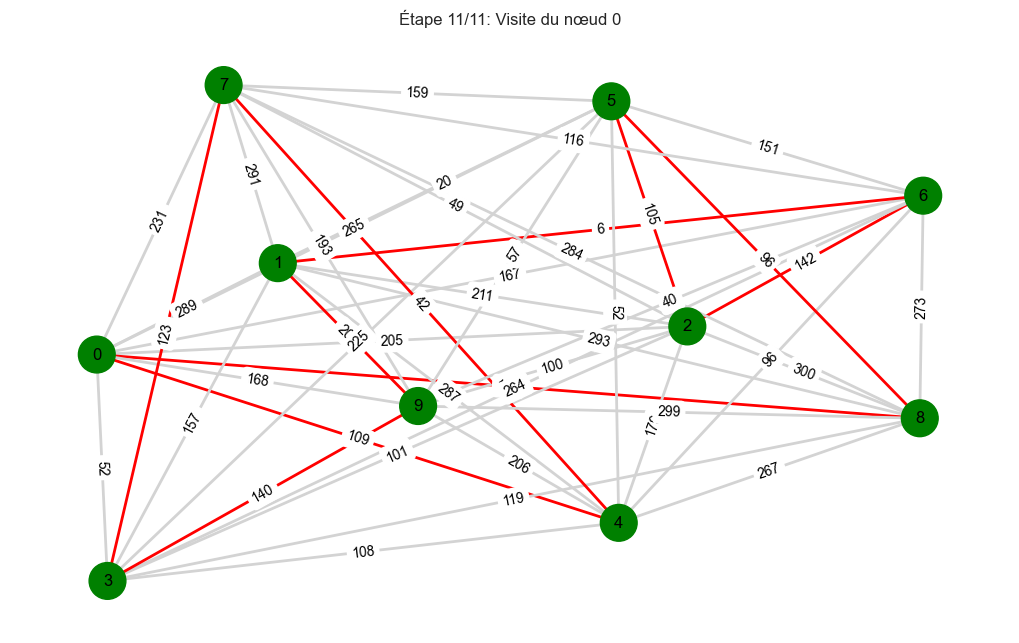

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import time
from IPython.display import clear_output

def animate_solution_path(graph, solution, delay=0.5):
    """
    Animation du parcours de la solution step by step.
    
    Parameters:
    -----------
    graph : dict
        Dictionnaire représentant le graphe
    solution : list
        Liste des nœuds représentant la solution
    delay : float, optional
        Délai entre chaque étape de l'animation en secondes
    """
    G = dict_to_graph(graph)
    pos = nx.spring_layout(G, seed=42)  # Position fixe pour tous les graphes
    
    # Pour chaque étape du chemin
    for i in range(len(solution)):
        # Effacer la sortie précédente
        clear_output(wait=True)
        
        plt.figure(figsize=(10, 6))
        
        # Colorer les arêtes parcourues jusqu'à présent
        path_edges = [(solution[j], solution[j + 1]) for j in range(min(i, len(solution)-1))]
        edge_colors = ['red' if (u, v) in path_edges or (v, u) in path_edges else 'lightgray' for u, v in G.edges]
        
        # Colorer les nœuds visités
        node_colors = ['green' if node in solution[:i+1] else 'lightblue' for node in G.nodes]
        
        # Dessiner le graphe avec les nœuds et arêtes colorés
        nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=700, edge_color=edge_colors, width=2)
        
        # Ajouter les poids des arêtes
        edge_labels = {(u, v): graph[u][v] for u, v in G.edges}
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
        
        # Ajouter un titre avec l'étape actuelle
        plt.title(f"Étape {i+1}/{len(solution)}: Visite du nœud {solution[i]}")
        plt.show()
        
        # Pause pour l'animation
        time.sleep(delay)

# Exemple d'utilisation
animate_solution_path(graph, solution, delay=1.0)

Parfois la solution initiale est déjà la meilleure solution.

Nous allons calculer le temps d'exécution à partir du nombre d'itérations et de la taille de l'instance.

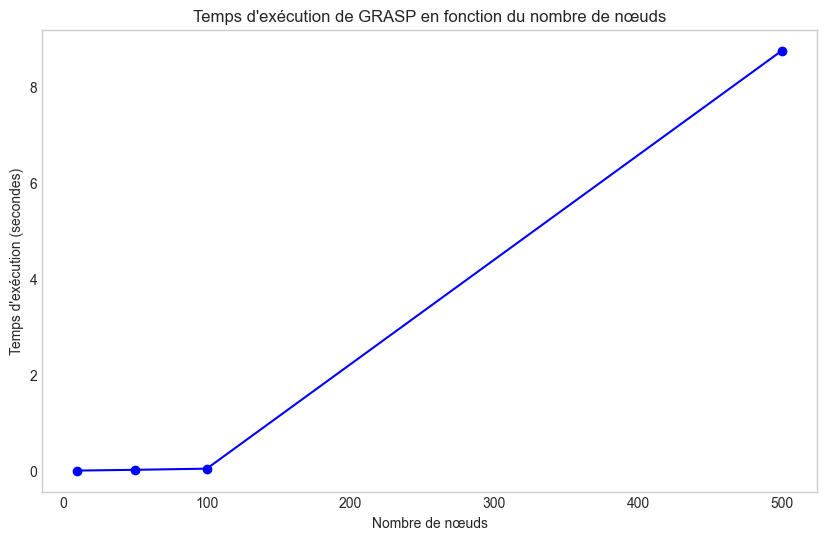

In [ ]:
import time

def test_GRASP(iterations=20, alpha=0.1):
    """
    Teste le GRASP avec un certain nombre d'itérations et trace un graphe du temps d'exécution
    en fonction du nombre de nœuds dans le graphe généré.

    iterations : int
        Nombre d'itérations pour la recherche locale
    alpha : float
        Paramètre alpha pour la taille de la RCL
    """
    nb_nodes_to_test = [10, 50, 100, 500]
    times = []

    for n in nb_nodes_to_test:
        # Générer un graphe avec n nœuds
        graph, dependencies, perturbated_edges = generate_data(
            n, (1, 300), 0.2, percentage_perturbations=0.2, percentage_dependency=0.2
        )

        # Construire une solution initiale
        start_time = time.time()
        solution = GRASP(graph, 0, dependencies, alpha=alpha, max_iterations=iterations)
        end_time = time.time()

        # Calculer le temps d'exécution
        times.append(end_time - start_time)

    # Tracer le graphe
    plt.figure(figsize=(10, 6))
    plt.plot(nb_nodes_to_test, times, marker='o', linestyle='-', color='b')
    plt.xlabel("Nombre de nœuds")
    plt.ylabel("Temps d'exécution (secondes)")
    plt.title("Temps d'exécution de GRASP en fonction du nombre de nœuds")
    plt.grid()
    plt.show()

# Exemple d'utilisation
test_GRASP(iterations=10)


Nous remarquons que plus il y a d'itérations, plus le temps d'exécution est long. Cependant ce dernier relativement court par rapport à la méthode PLNE. 

## 3. Plan d'expérience

### 3.1 Objectifs
Comparer les performances de GRASP vs PLNE pour résoudre le TSP avec contraintes en analysant :
- Impact des paramètres GRASP sur qualité et temps
- Impact de la taille des instances
- Limites pratiques de chaque méthode

### 3.2 Paramètres étudiés
| Paramètre | Valeurs testées |
|-----------|----------------|
| Alpha (GRASP) | 0.1, 0.3, 0.5, 0.7 |
| Itérations (GRASP) | 3, 5, 10, 20 |
| Taille (villes) | 10, 20, 30, 50, 100 |
| Taux dépendances | 10%, 20%, 30% |
| Répétitions | 30 par configuration |

### 3.3 Métriques
- Temps d'exécution (moyenne, écart-type)
- Qualité de la solution (coût)
- Gap par rapport à l'optimal (quand disponible)
- Taux de succès PLNE

### 3.4 Protocole
1. Générer instances aléatoires
2. Exécuter PLNE (limite 60s) et GRASP
3. Collecter métriques pour chaque exécution
4. Analyser statistiquement les résultats

### 3.5 Analyses prévues
- Impact des paramètres GRASP (ANOVA)
- Comparaison PLNE vs GRASP (temps, qualité)
- Identification du seuil de viabilité PLNE
- Recommandations par taille d'instance

## 4. Étude expérimentale de la qualité

Cette section présente les résultats de nos expériences comparant GRASP et PLNE. Nous analysons l'impact des paramètres sur les performances et fournissons des recommandations pratiques basées sur des analyses statistiques rigoureuses.

In [ ]:
def run_comprehensive_experiment():
    """
    Exécution de l'expérience complète avec collecte détaillée des données
    """
    # Configuration
    sizes = [10, 20, 30, 50, 100]
    alphas = [0.1, 0.3, 0.5, 0.7]
    iterations = [3, 5, 10, 20]
    dependency_rates = [0.1, 0.2, 0.3]
    repetitions = 30
    
    results = []
    total_experiments = len(sizes) * len(alphas) * len(iterations) * len(dependency_rates) * repetitions
    experiment_counter = 0
    
    # Exécution PLNE (jusqu'à 30 villes)
    for size in sizes:
        if size <= 30:
            for dep_rate in dependency_rates:
                for rep in range(repetitions):
                    graph, dependencies, _ = generate_data(size, (1, 300), 0.2, 
                                                         percentage_dependency=dep_rate)
                    
                    start_time = time.time()
                    try:
                        cycle, cost, _ = use_solver_pulp(graph, dependencies)
                        success = cycle is not None
                        cost = cost * 60 if cost else None  # Conversion en minutes
                    except:
                        success = False
                        cost = None
                    
                    execution_time = time.time() - start_time
                    
                    results.append({
                        'method': 'PLNE',
                        'size': size,
                        'alpha': None,
                        'iterations': None,
                        'dependency_rate': dep_rate,
                        'repetition': rep,
                        'time': execution_time,
                        'cost': cost,
                        'success': success
                    })
    
    # Exécution GRASP
    for size in sizes:
        for alpha in alphas:
            for num_iter in iterations:
                for dep_rate in dependency_rates:
                    for rep in range(repetitions):
                        experiment_counter += 1
                        if experiment_counter % 500 == 0:
                            print(f"Progression: {experiment_counter}/{total_experiments} ({experiment_counter/total_experiments*100:.1f}%)")
                        
                        graph, dependencies, _ = generate_data(size, (1, 300), 0.2, 
                                                             percentage_dependency=dep_rate)
                        
                        start_time = time.time()
                        solution = GRASP(graph, 0, dependencies, alpha=alpha, max_iterations=num_iter)
                        execution_time = time.time() - start_time
                        
                        cost = calculate_cost(graph, solution)  # En minutes
                        
                        results.append({
                            'method': 'GRASP',
                            'size': size,
                            'alpha': alpha,
                            'iterations': num_iter,
                            'dependency_rate': dep_rate,
                            'repetition': rep,
                            'time': execution_time,
                            'cost': cost,
                            'success': True
                        })
    
    return pd.DataFrame(results)



In [ ]:
# Exécution de l'expérience
print("Début de l'expérience complète...")
results_df = run_comprehensive_experiment()
print(f"Expérience terminée. {len(results_df)} résultats collectés.")

Début de l'expérience complète...


In [ ]:
def generate_descriptive_statistics(df):
    """
    Génère des statistiques descriptives complètes
    """
    # Statistiques globales par méthode
    global_stats = df.groupby('method').agg({
        'time': ['count', 'mean', 'std', 'min', 'max'],
        'cost': ['mean', 'std', 'min', 'max'],
        'success': 'mean'
    }).round(3)
    
    print("=== STATISTIQUES GLOBALES PAR MÉTHODE ===")
    display(global_stats)
    
    # Statistiques par taille d'instance
    size_stats = df.groupby(['method', 'size']).agg({
        'time': ['mean', 'std'],
        'cost': ['mean', 'std']
    }).round(3)
    
    print("\n=== STATISTIQUES PAR TAILLE D'INSTANCE ===")
    display(size_stats)
    
    # Statistiques GRASP par paramètres
    grasp_stats = df[df['method'] == 'GRASP'].groupby(['alpha', 'iterations']).agg({
        'time': ['mean', 'std'],
        'cost': ['mean', 'std']
    }).round(3)
    
    print("\n=== STATISTIQUES GRASP PAR PARAMÈTRES ===")
    display(grasp_stats)
    
    return global_stats, size_stats, grasp_stats

global_stats, size_stats, grasp_stats = generate_descriptive_statistics(results_df)

=== STATISTIQUES GLOBALES PAR MÉTHODE ===


time                                     cost                   \
       count    mean     std   min      max      mean       std    min   
method                                                                   
GRASP   7200   0.042   0.090  0.00    0.685  2556.124  2021.640  281.0   
PLNE     270  23.127  61.425  0.05  299.991   556.159   102.928  296.0   

                success  
            max    mean  
method                   
GRASP   12100.0     1.0  
PLNE      854.0     1.0


=== STATISTIQUES PAR TAILLE D'INSTANCE ===


time              cost          
               mean     std      mean       std
method size                                    
GRASP  10     0.000   0.000   837.286   202.929
       20     0.001   0.001  1389.740   341.832
       30     0.003   0.002  1933.681   564.521
       50     0.017   0.010  2995.388   997.734
       100    0.188   0.116  5624.528  2157.321
PLNE   10     0.228   0.227   556.867   127.803
       20    12.867  41.901   551.300    99.530
       30    56.287  88.879   560.311    75.756


=== STATISTIQUES GRASP PAR PARAMÈTRES ===


time             cost          
                   mean    std      mean       std
alpha iterations                                  
0.1   3.0         0.028  0.057  1464.827   671.316
      5.0         0.026  0.057  1470.687   696.147
      10.0        0.027  0.056  1479.162   691.853
      20.0        0.026  0.054  1482.453   689.845
0.3   3.0         0.035  0.067  2357.753  1558.098
      5.0         0.035  0.070  2369.507  1548.865
      10.0        0.035  0.073  2370.429  1553.307
      20.0        0.035  0.070  2366.971  1581.132
0.5   3.0         0.043  0.086  3031.751  2219.380
      5.0         0.051  0.105  3021.220  2174.592
      10.0        0.052  0.106  3021.869  2176.465
      20.0        0.051  0.111  3057.067  2248.307
0.7   3.0         0.045  0.086  3382.873  2543.957
      5.0         0.058  0.120  3344.687  2606.964
      10.0        0.065  0.131  3270.669  2400.306
      20.0        0.057  0.118  3406.067  2670.327

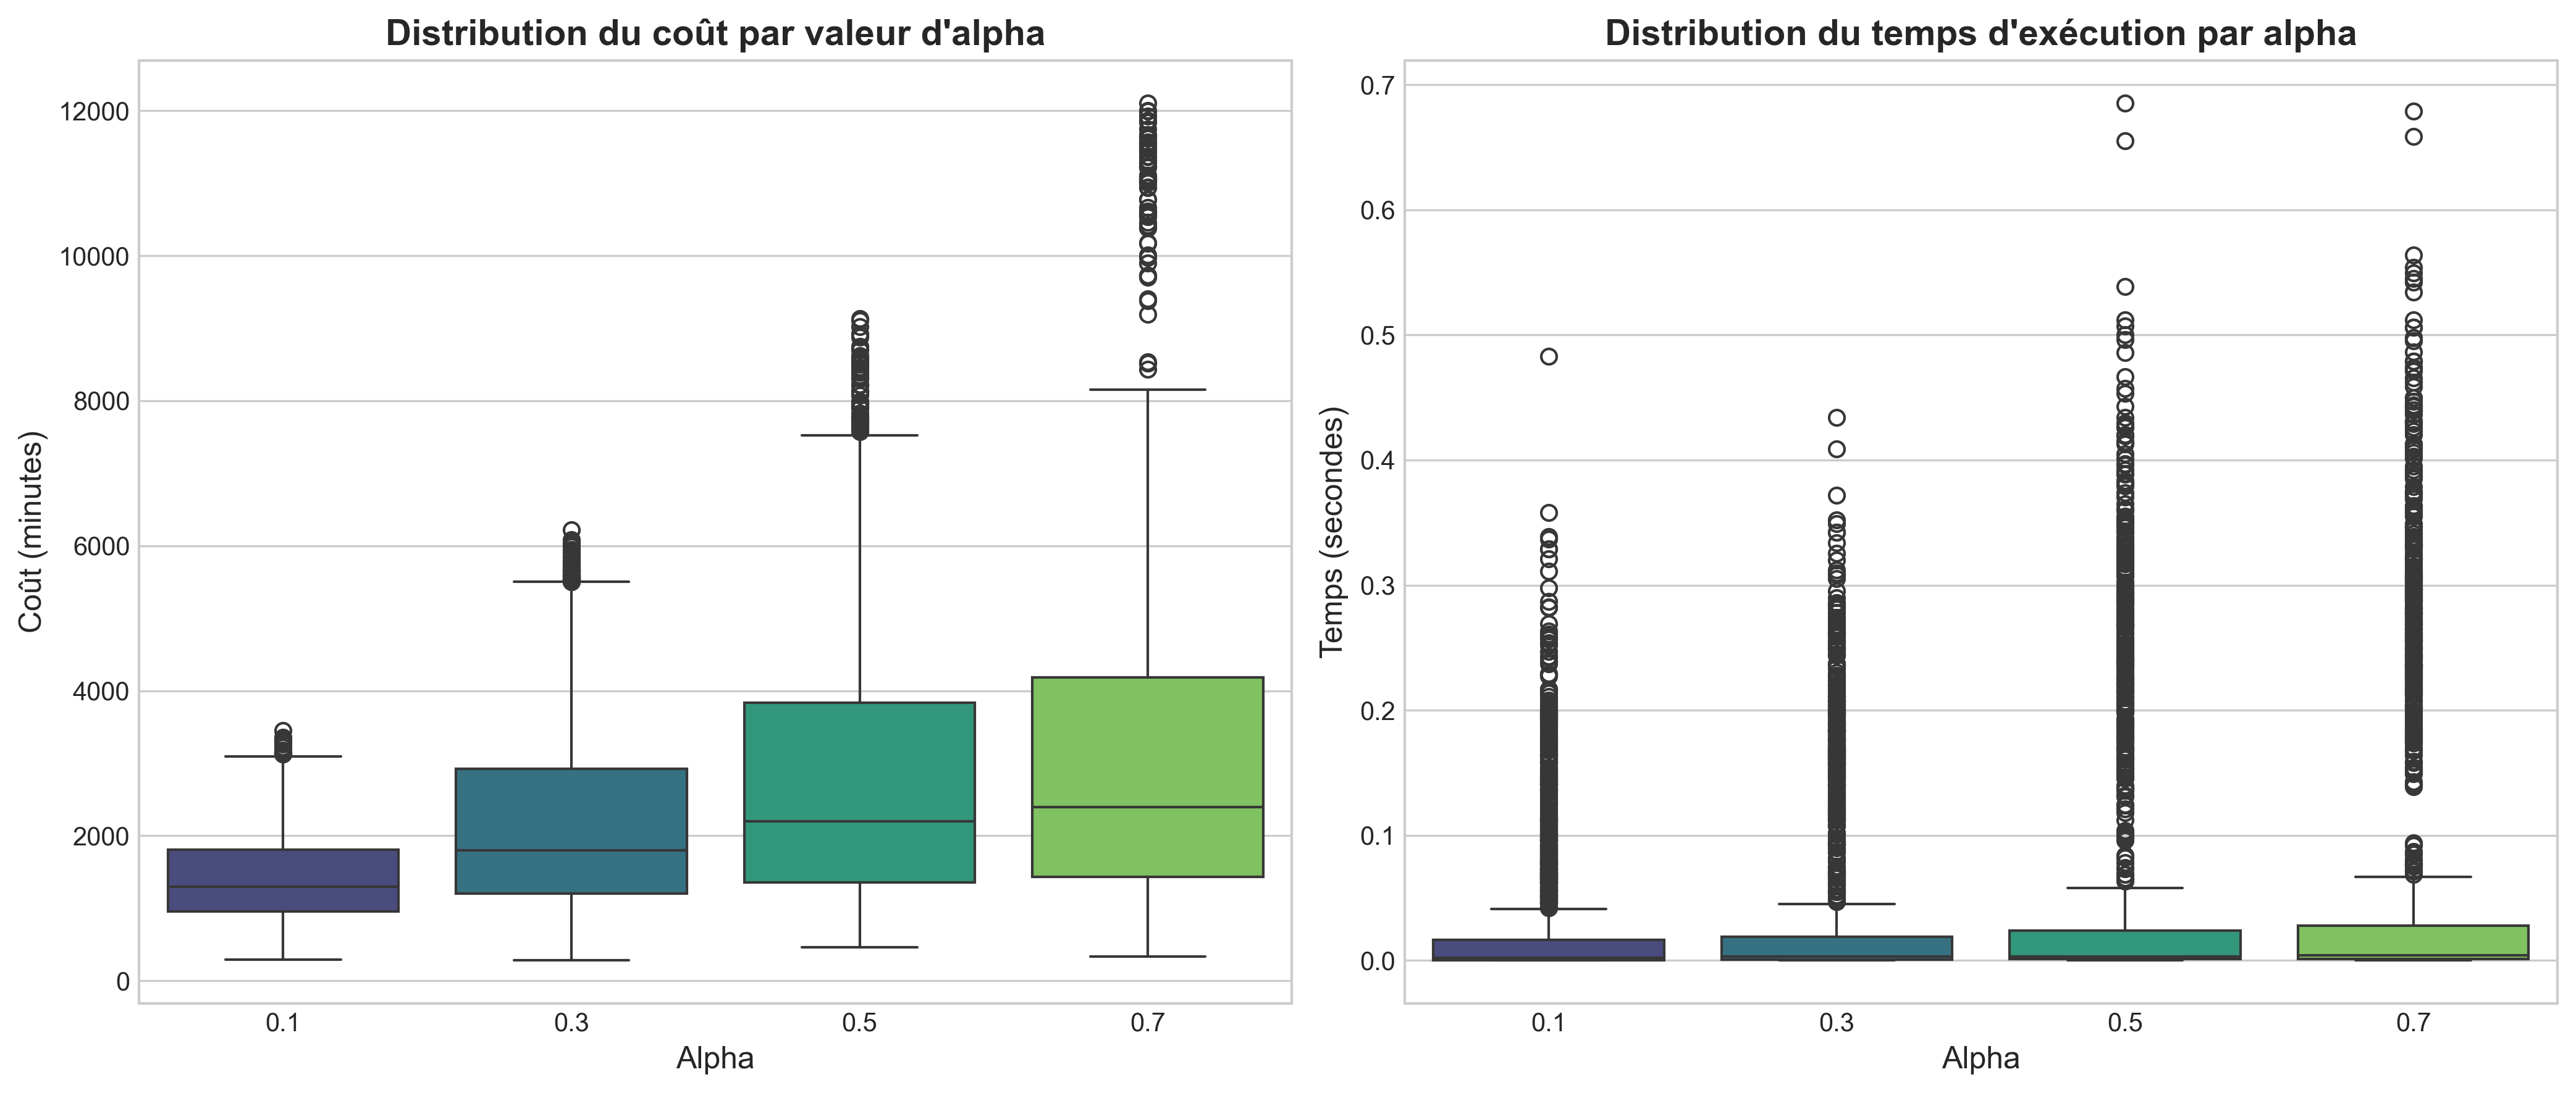

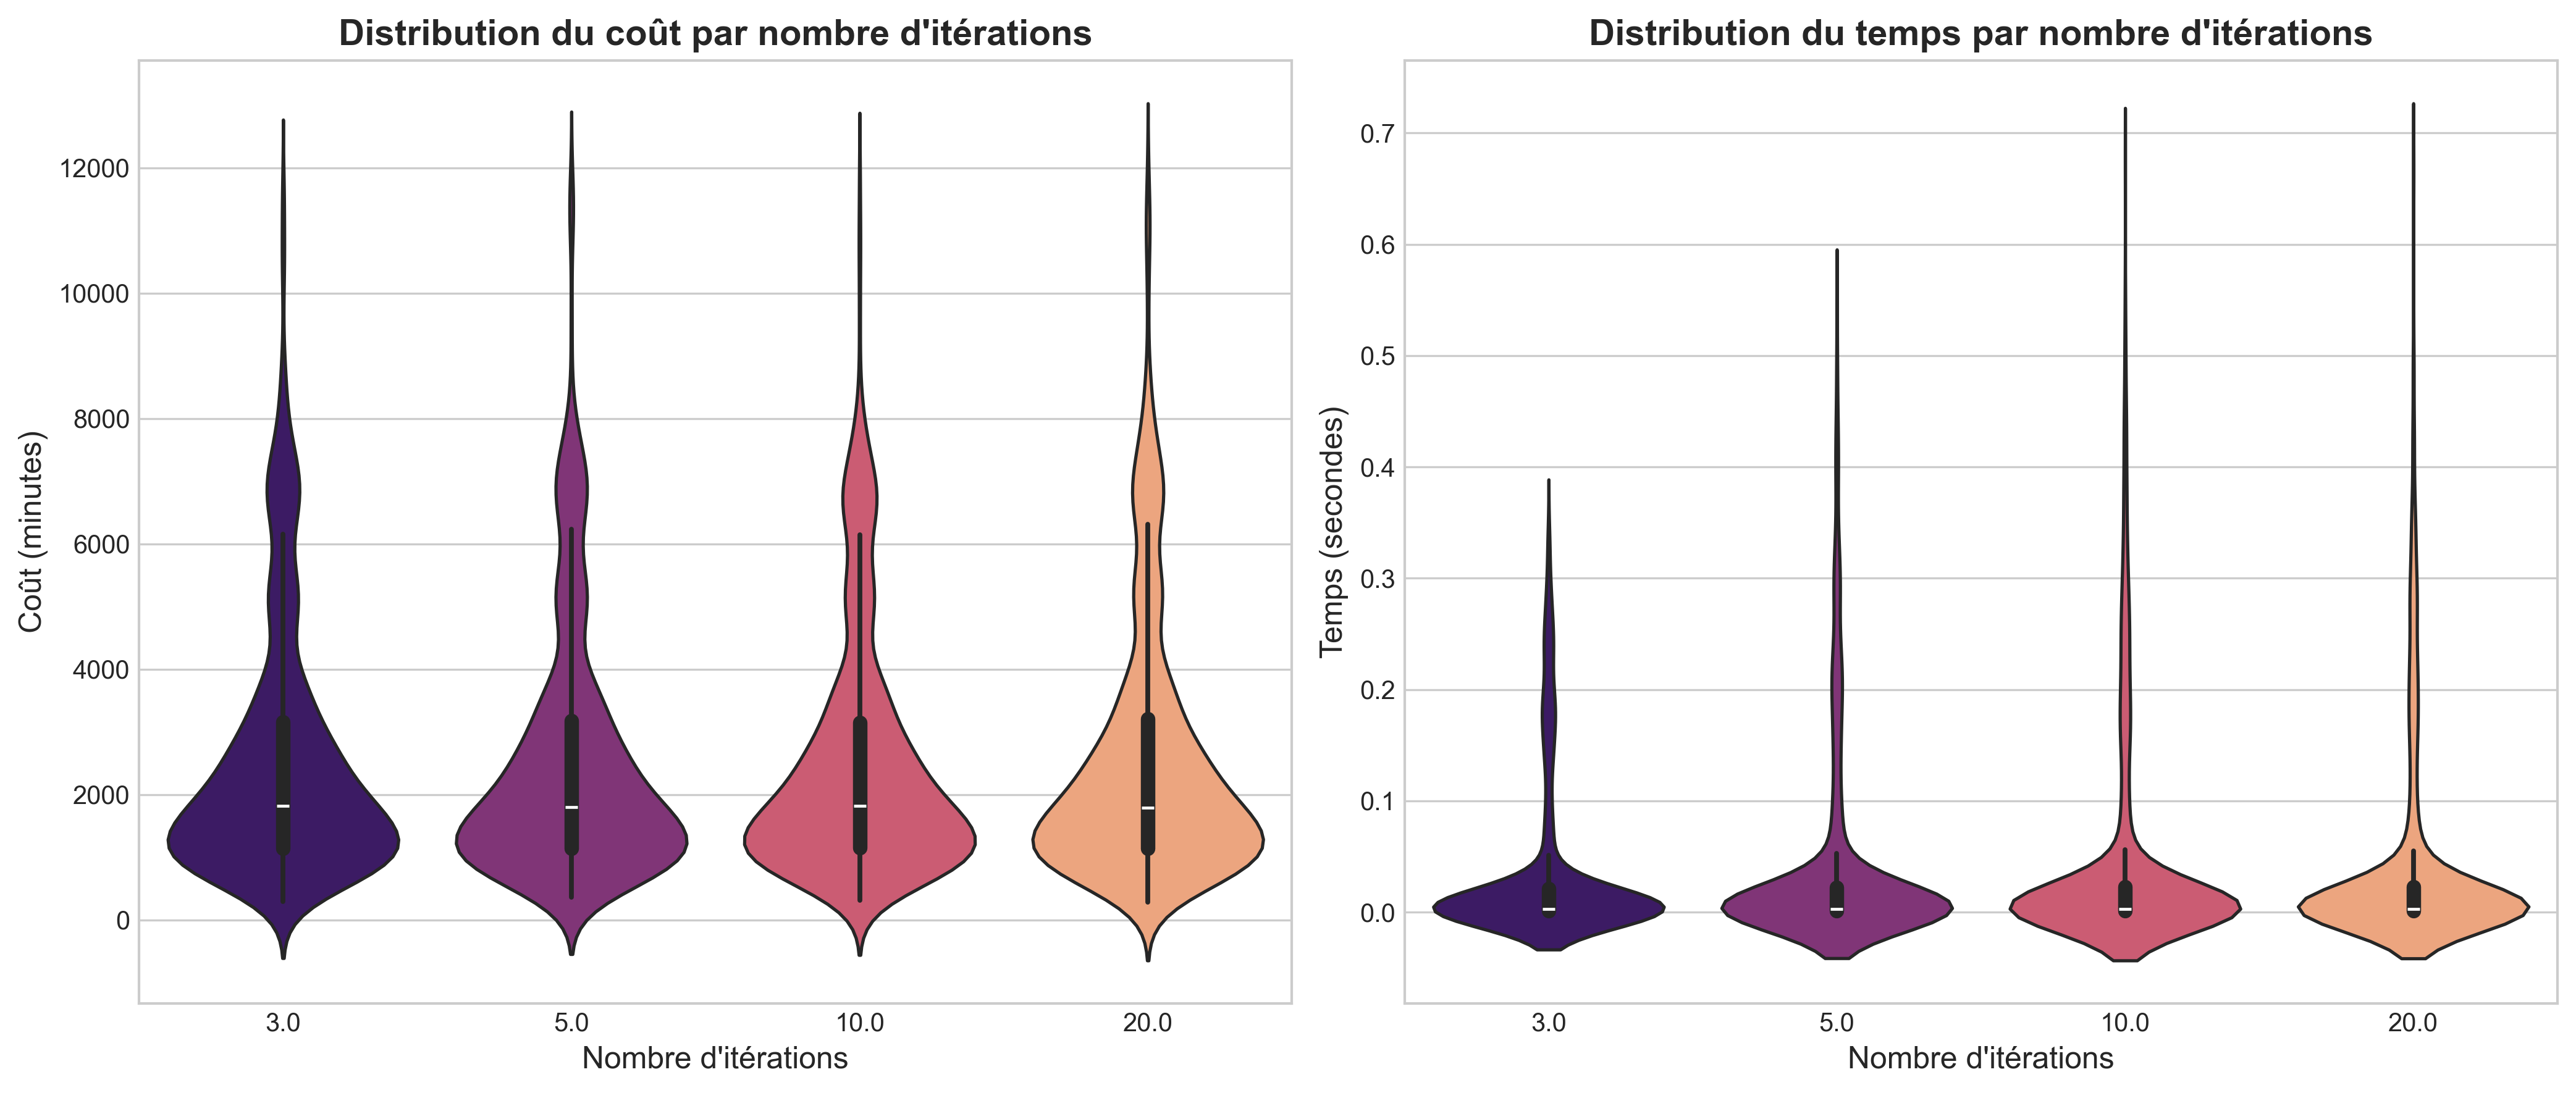

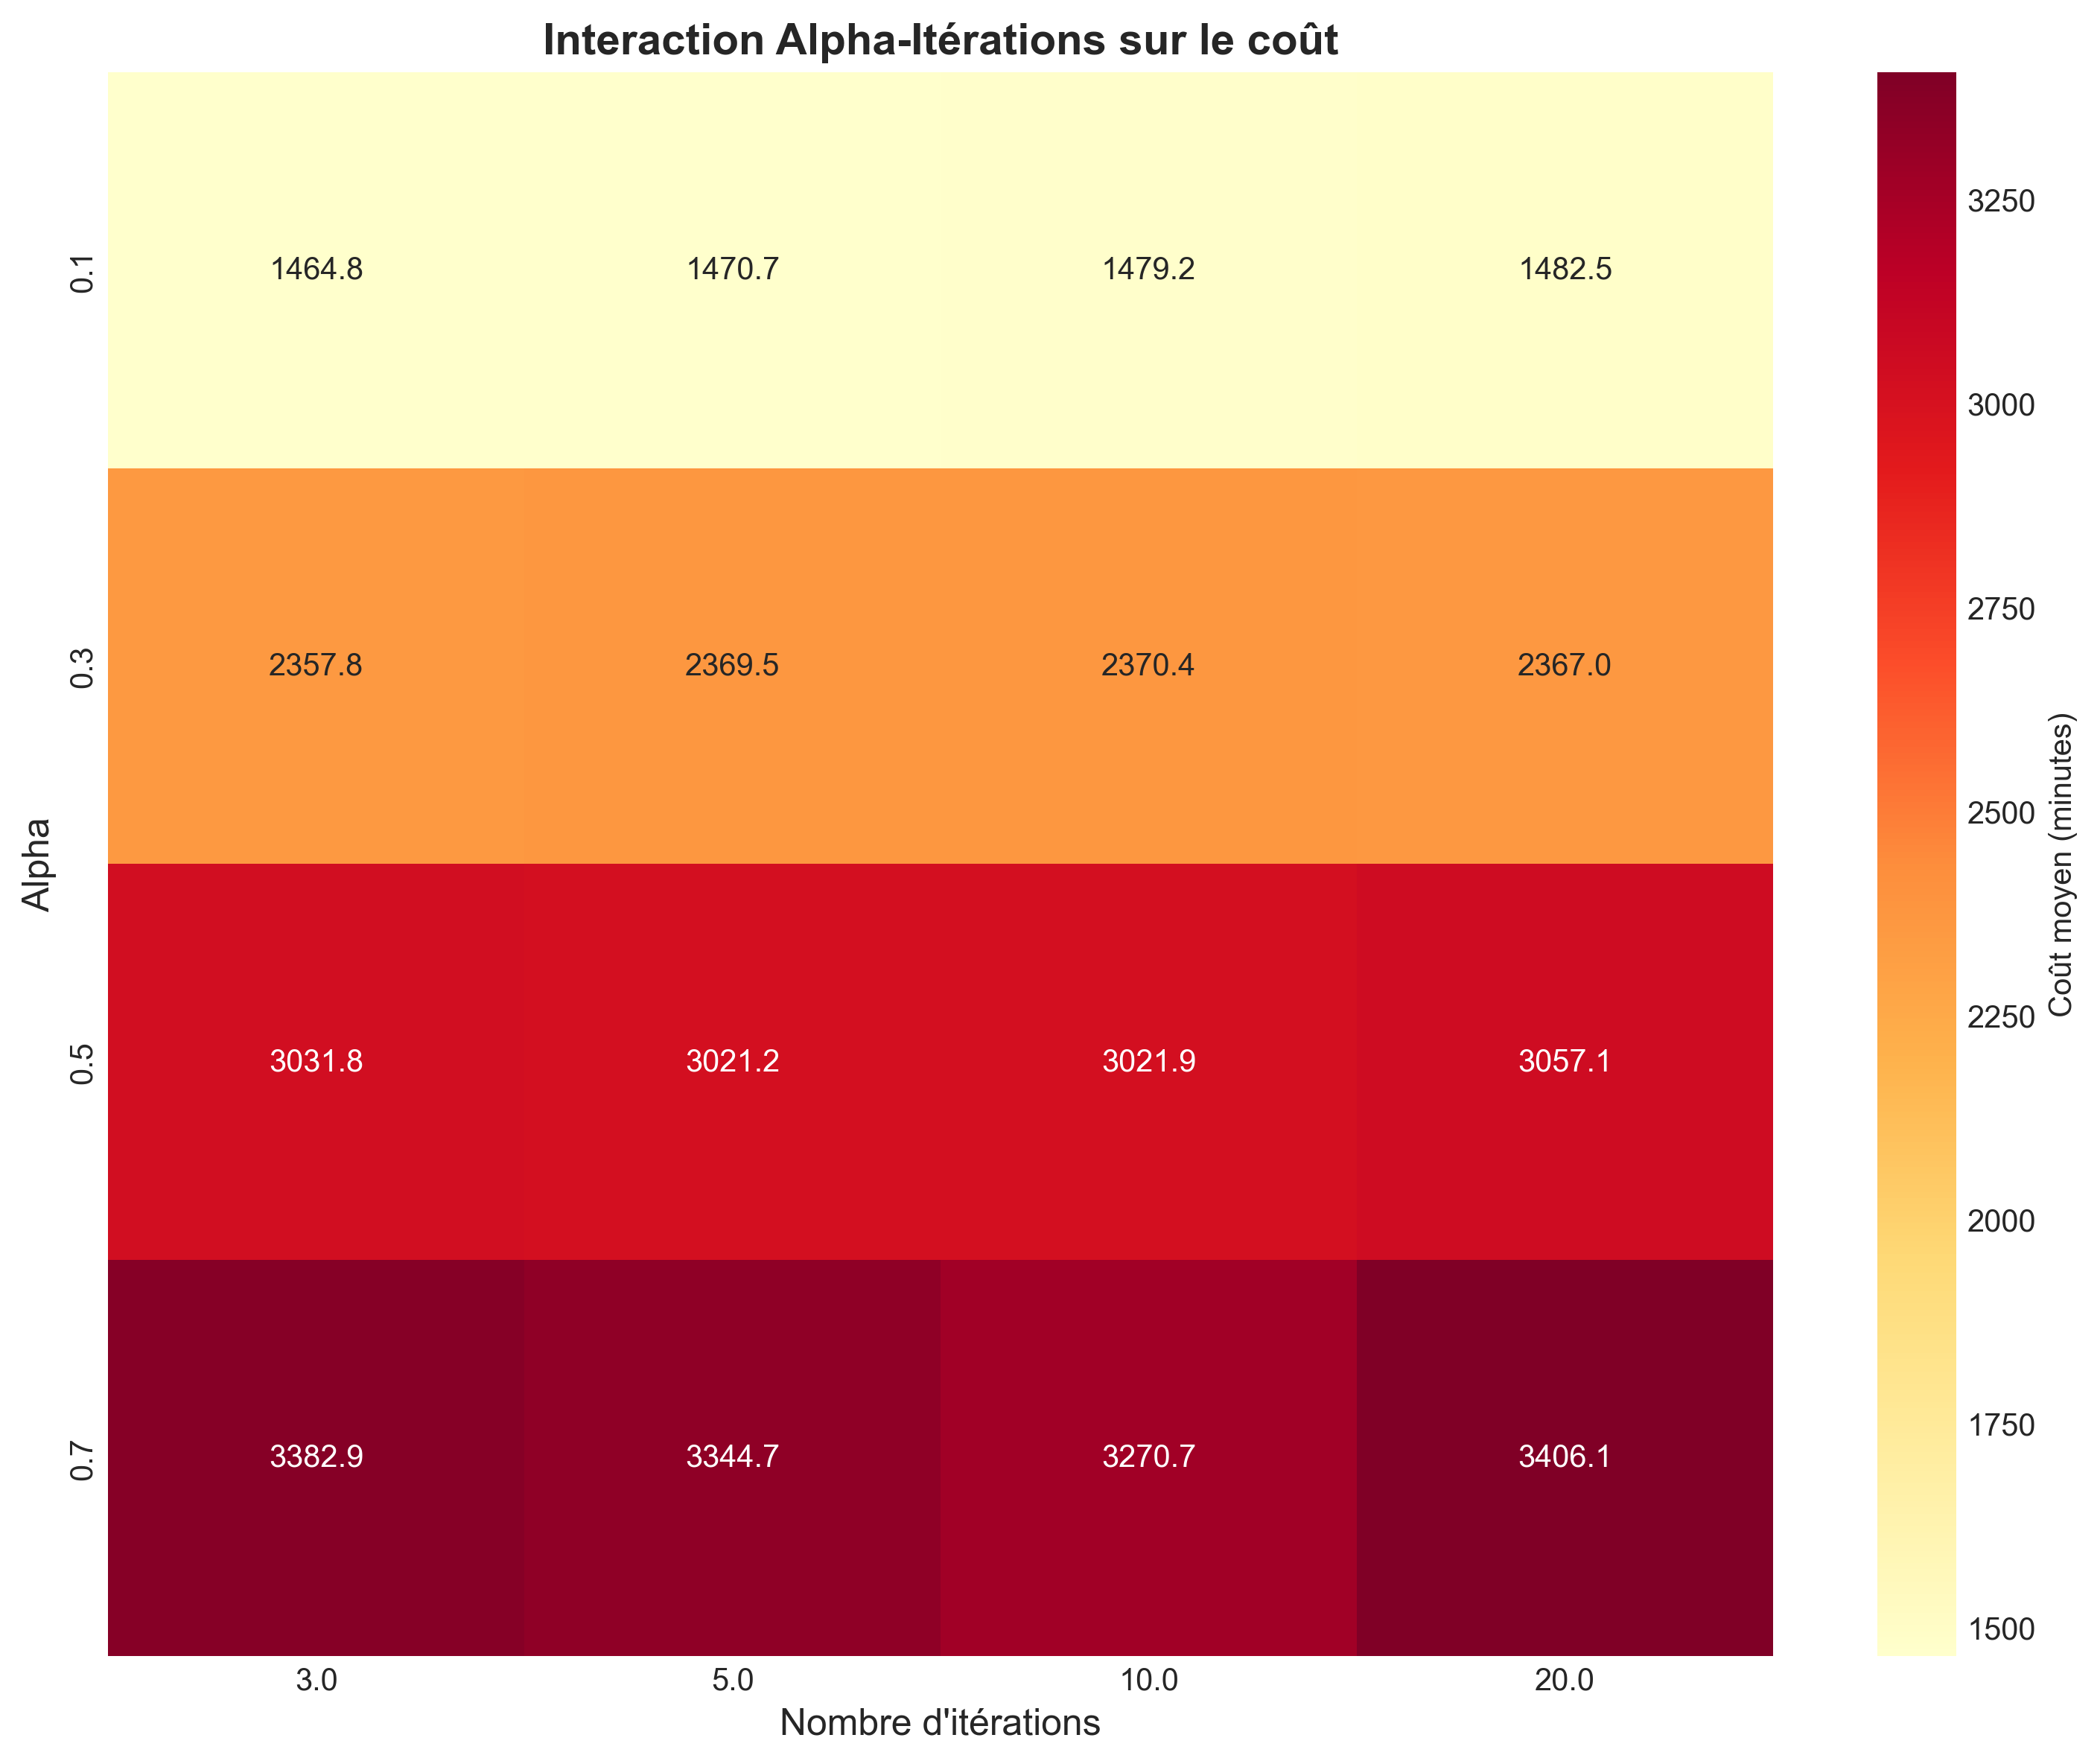

In [ ]:
def visualize_grasp_parameters(df):
    """
    Visualise l'impact des paramètres GRASP sur la performance
    """
    grasp_data = df[df['method'] == 'GRASP']
    
    # Figure 1: Impact d'alpha
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Boîtes à moustaches pour le coût par alpha
    sns.boxplot(data=grasp_data, x='alpha', y='cost', ax=axes[0], palette='viridis')
    axes[0].set_title('Distribution du coût par valeur d\'alpha', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Alpha', fontsize=12)
    axes[0].set_ylabel('Coût (minutes)', fontsize=12)
    
    # Boîtes à moustaches pour le temps par alpha
    sns.boxplot(data=grasp_data, x='alpha', y='time', ax=axes[1], palette='viridis')
    axes[1].set_title('Distribution du temps d\'exécution par alpha', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Alpha', fontsize=12)
    axes[1].set_ylabel('Temps (secondes)', fontsize=12)
    
    plt.tight_layout()
    plt.show()
    
    # Figure 2: Impact des itérations
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Violon plot pour le coût par nombre d'itérations
    sns.violinplot(data=grasp_data, x='iterations', y='cost', ax=axes[0], palette='magma')
    axes[0].set_title('Distribution du coût par nombre d\'itérations', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Nombre d\'itérations', fontsize=12)
    axes[0].set_ylabel('Coût (minutes)', fontsize=12)
    
    # Violon plot pour le temps par nombre d'itérations
    sns.violinplot(data=grasp_data, x='iterations', y='time', ax=axes[1], palette='magma')
    axes[1].set_title('Distribution du temps par nombre d\'itérations', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Nombre d\'itérations', fontsize=12)
    axes[1].set_ylabel('Temps (secondes)', fontsize=12)
    
    plt.tight_layout()
    plt.show()
    
    # Figure 3: Heatmap de l'interaction alpha-itérations
    interaction_cost = grasp_data.pivot_table(values='cost', index='alpha', columns='iterations', aggfunc='mean')
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(interaction_cost, annot=True, fmt='.1f', cmap='YlOrRd', 
                cbar_kws={'label': 'Coût moyen (minutes)'})
    plt.title('Interaction Alpha-Itérations sur le coût', fontsize=14, fontweight='bold')
    plt.xlabel('Nombre d\'itérations', fontsize=12)
    plt.ylabel('Alpha', fontsize=12)
    plt.tight_layout()
    plt.show()

visualize_grasp_parameters(results_df)

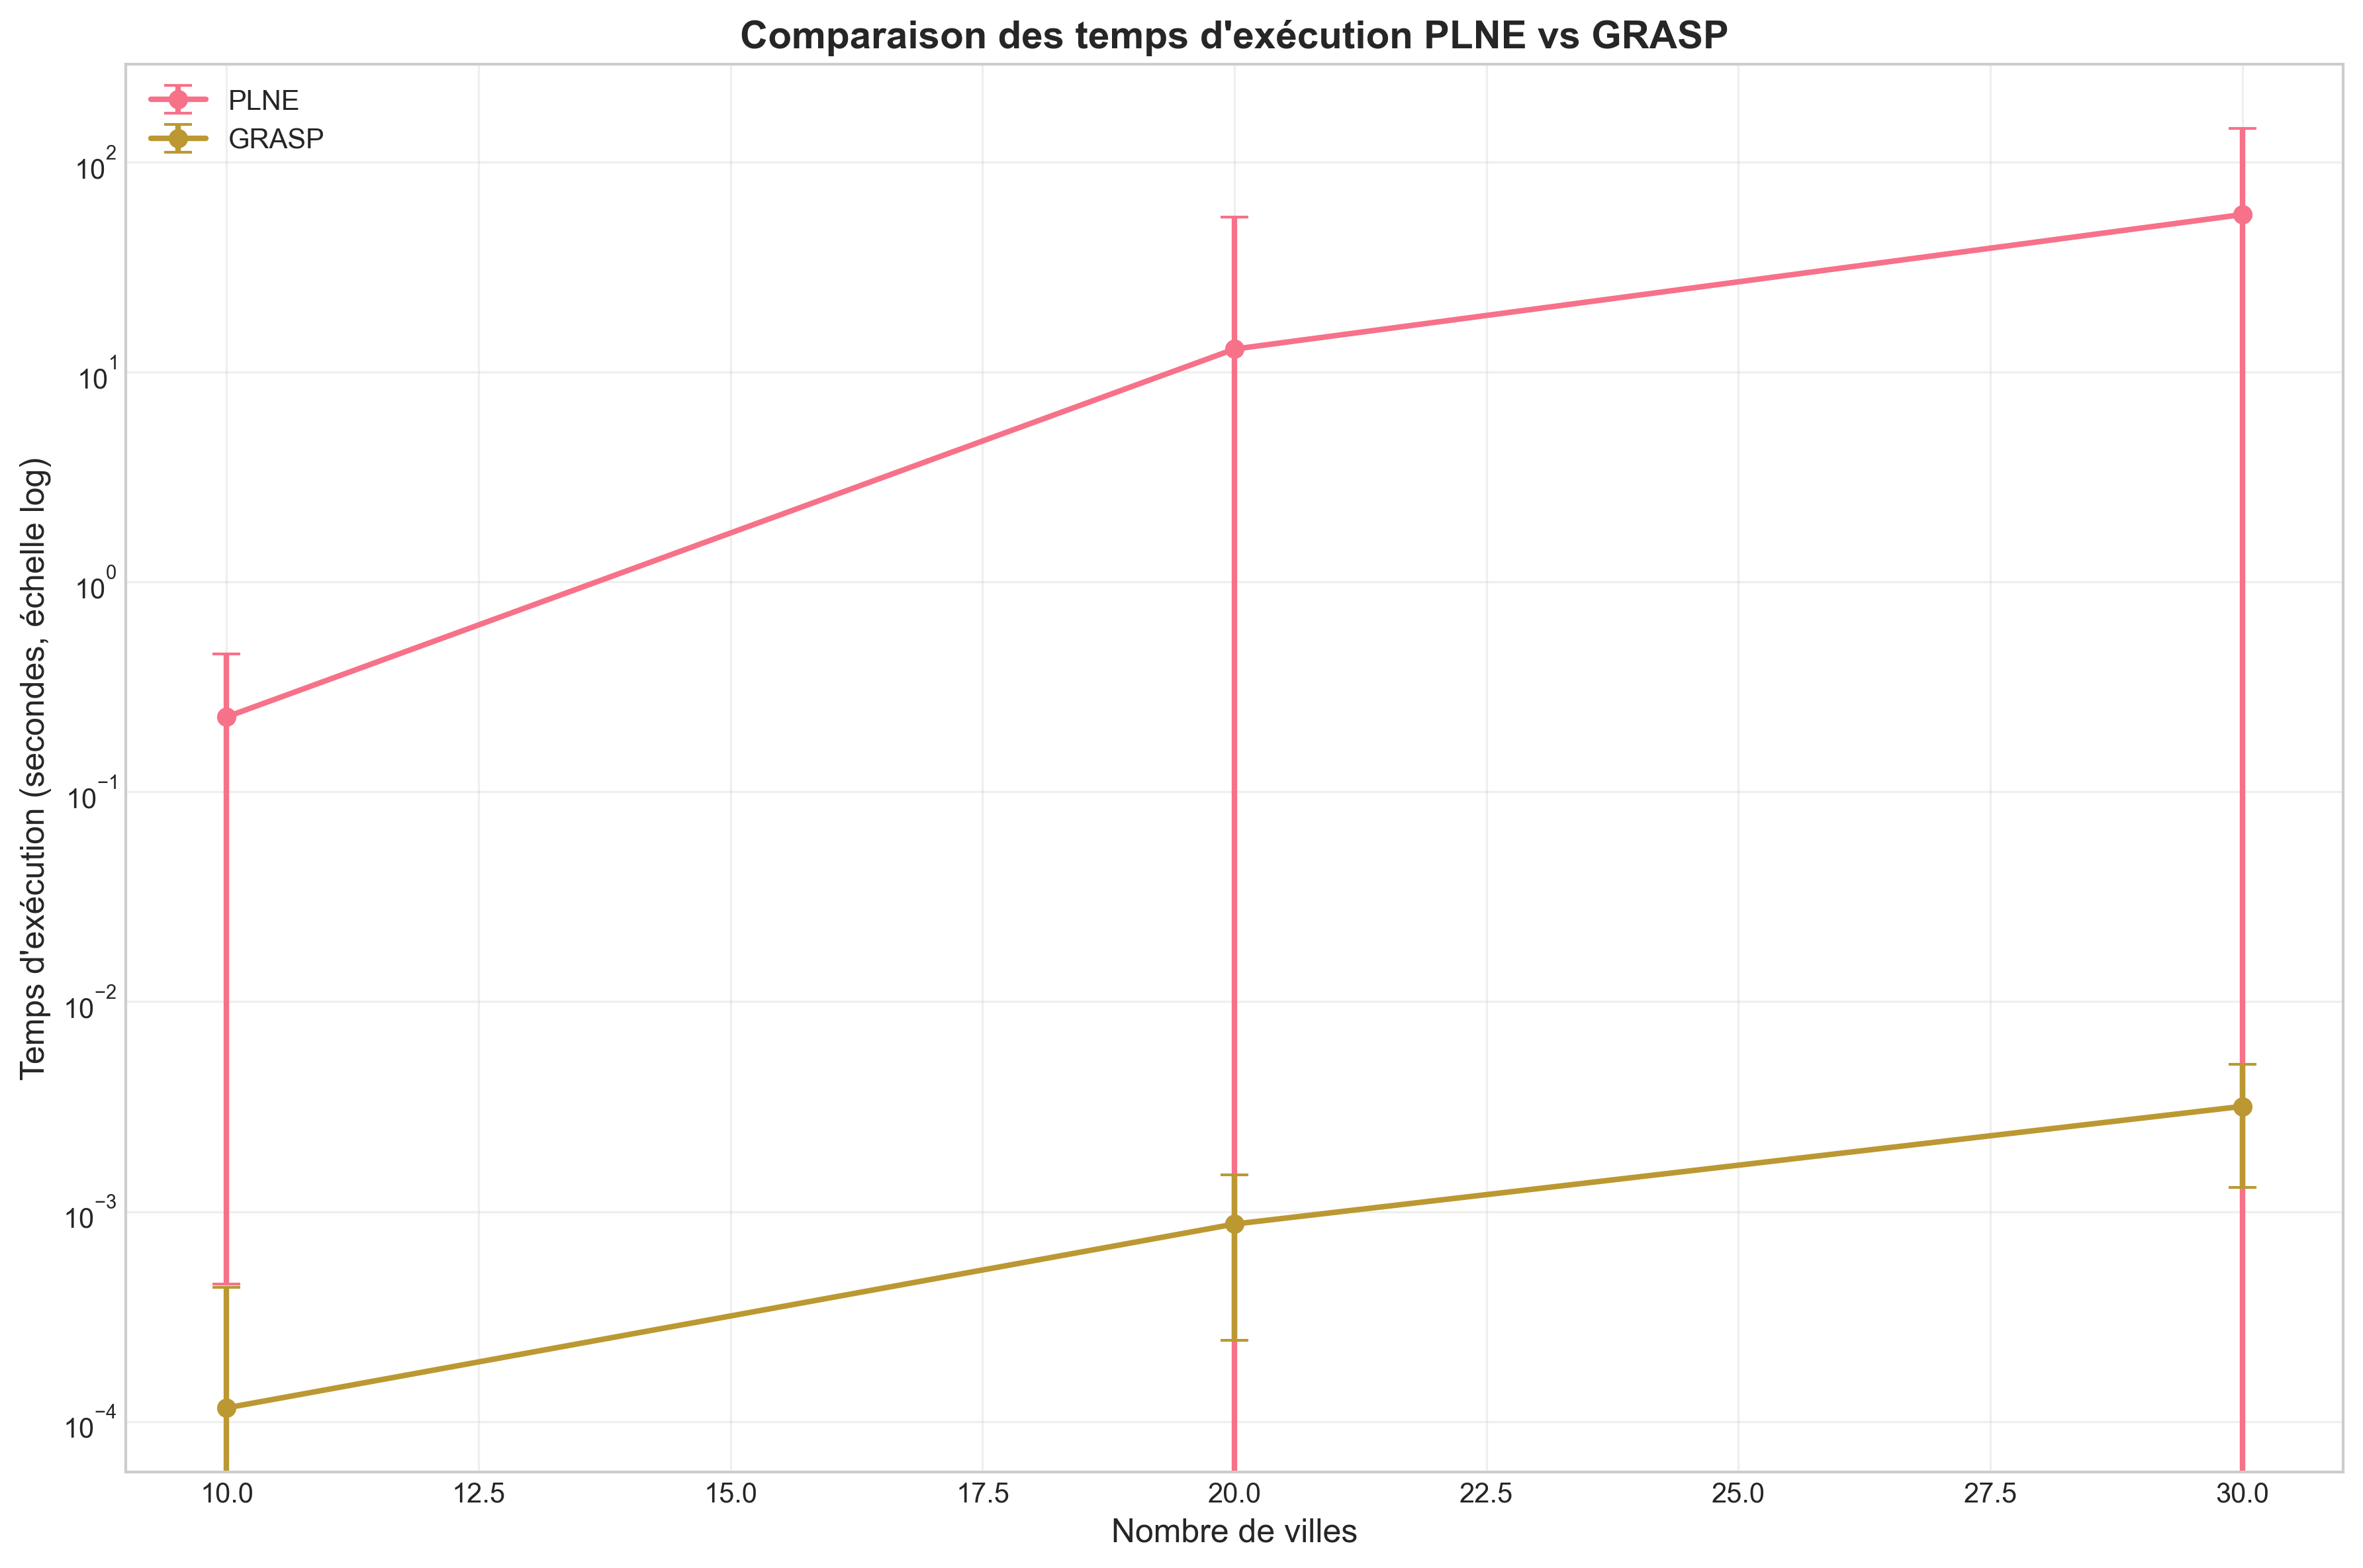

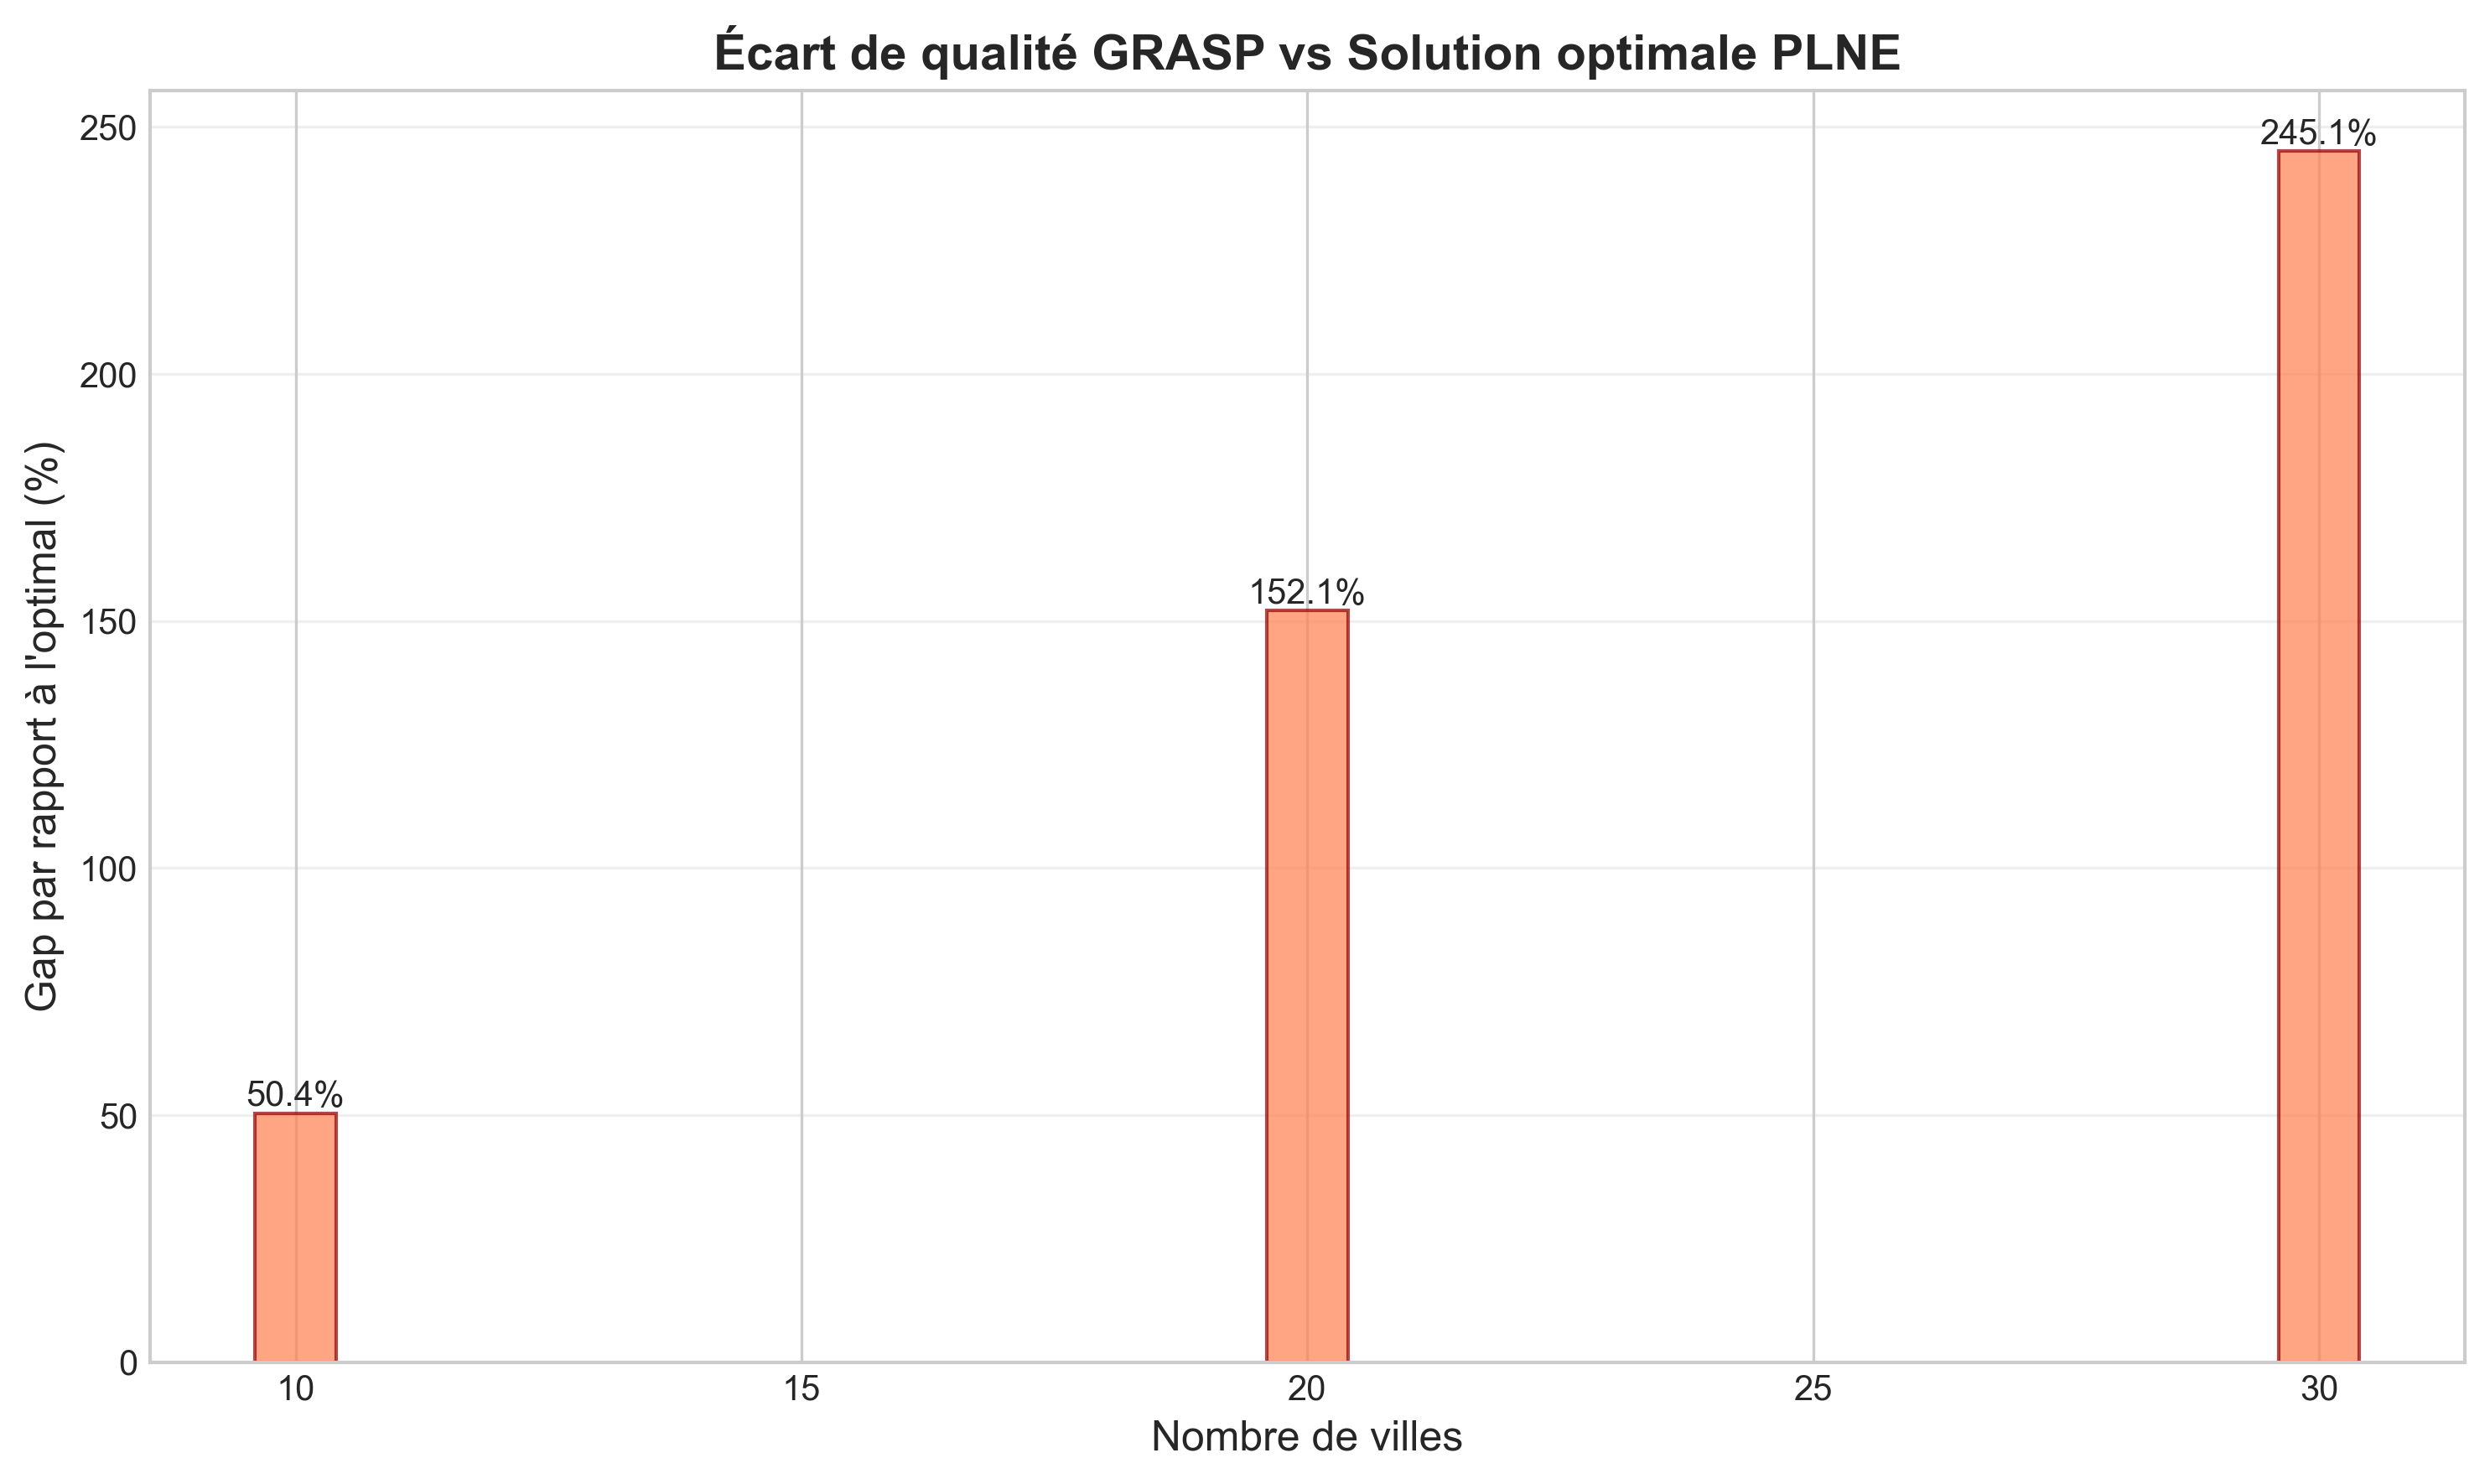

=== TABLEAU COMPARATIF PLNE vs GRASP ===


time              cost          success
               mean     std      mean      std    mean
method size                                           
GRASP  10     0.000   0.000   837.286  202.929     1.0
       20     0.001   0.001  1389.740  341.832     1.0
       30     0.003   0.002  1933.681  564.521     1.0
PLNE   10     0.228   0.227   556.867  127.803     1.0
       20    12.867  41.901   551.300   99.530     1.0
       30    56.287  88.879   560.311   75.756     1.0

In [ ]:
def compare_plne_grasp(df):
    """
    Compare les performances de PLNE et GRASP
    """
    # Filtrer pour les instances communes (≤ 30 villes)
    common_df = df[df['size'] <= 30]
    
    # Figure 1: Comparaison des temps d'exécution
    plt.figure(figsize=(12, 8))
    
    for method in ['PLNE', 'GRASP']:
        subset = common_df[common_df['method'] == method]
        means = subset.groupby('size')['time'].mean()
        stds = subset.groupby('size')['time'].std()
        
        plt.errorbar(means.index, means.values, yerr=stds.values, 
                    label=method, marker='o', capsize=5, linewidth=2)
    
    plt.yscale('log')
    plt.xlabel('Nombre de villes', fontsize=12)
    plt.ylabel('Temps d\'exécution (secondes, échelle log)', fontsize=12)
    plt.title('Comparaison des temps d\'exécution PLNE vs GRASP', fontsize=14, fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Figure 2: Gap de qualité
    gap_data = []
    for size in common_df['size'].unique():
        plne_cost = common_df[(common_df['method'] == 'PLNE') & 
                             (common_df['size'] == size)]['cost'].mean()
        grasp_cost = common_df[(common_df['method'] == 'GRASP') & 
                              (common_df['size'] == size)]['cost'].mean()
        
        if plne_cost and grasp_cost and not np.isnan(plne_cost):
            gap = (grasp_cost - plne_cost) / plne_cost * 100
            gap_data.append({'size': size, 'gap': gap})
    
    gap_df = pd.DataFrame(gap_data)
    
    plt.figure(figsize=(10, 6))
    bars = plt.bar(gap_df['size'], gap_df['gap'], color='coral', edgecolor='darkred', alpha=0.7)
    plt.xlabel('Nombre de villes', fontsize=12)
    plt.ylabel('Gap par rapport à l\'optimal (%)', fontsize=12)
    plt.title('Écart de qualité GRASP vs Solution optimale PLNE', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3, axis='y')
    
    # Ajouter les valeurs sur les barres
    for bar, gap in zip(bars, gap_df['gap']):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
                f'{gap:.1f}%', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    
    # Tableau comparatif
    comparison_stats = common_df.groupby(['method', 'size']).agg({
        'time': ['mean', 'std'],
        'cost': ['mean', 'std'],
        'success': 'mean'
    }).round(3)
    
    print("=== TABLEAU COMPARATIF PLNE vs GRASP ===")
    display(comparison_stats)

compare_plne_grasp(results_df)

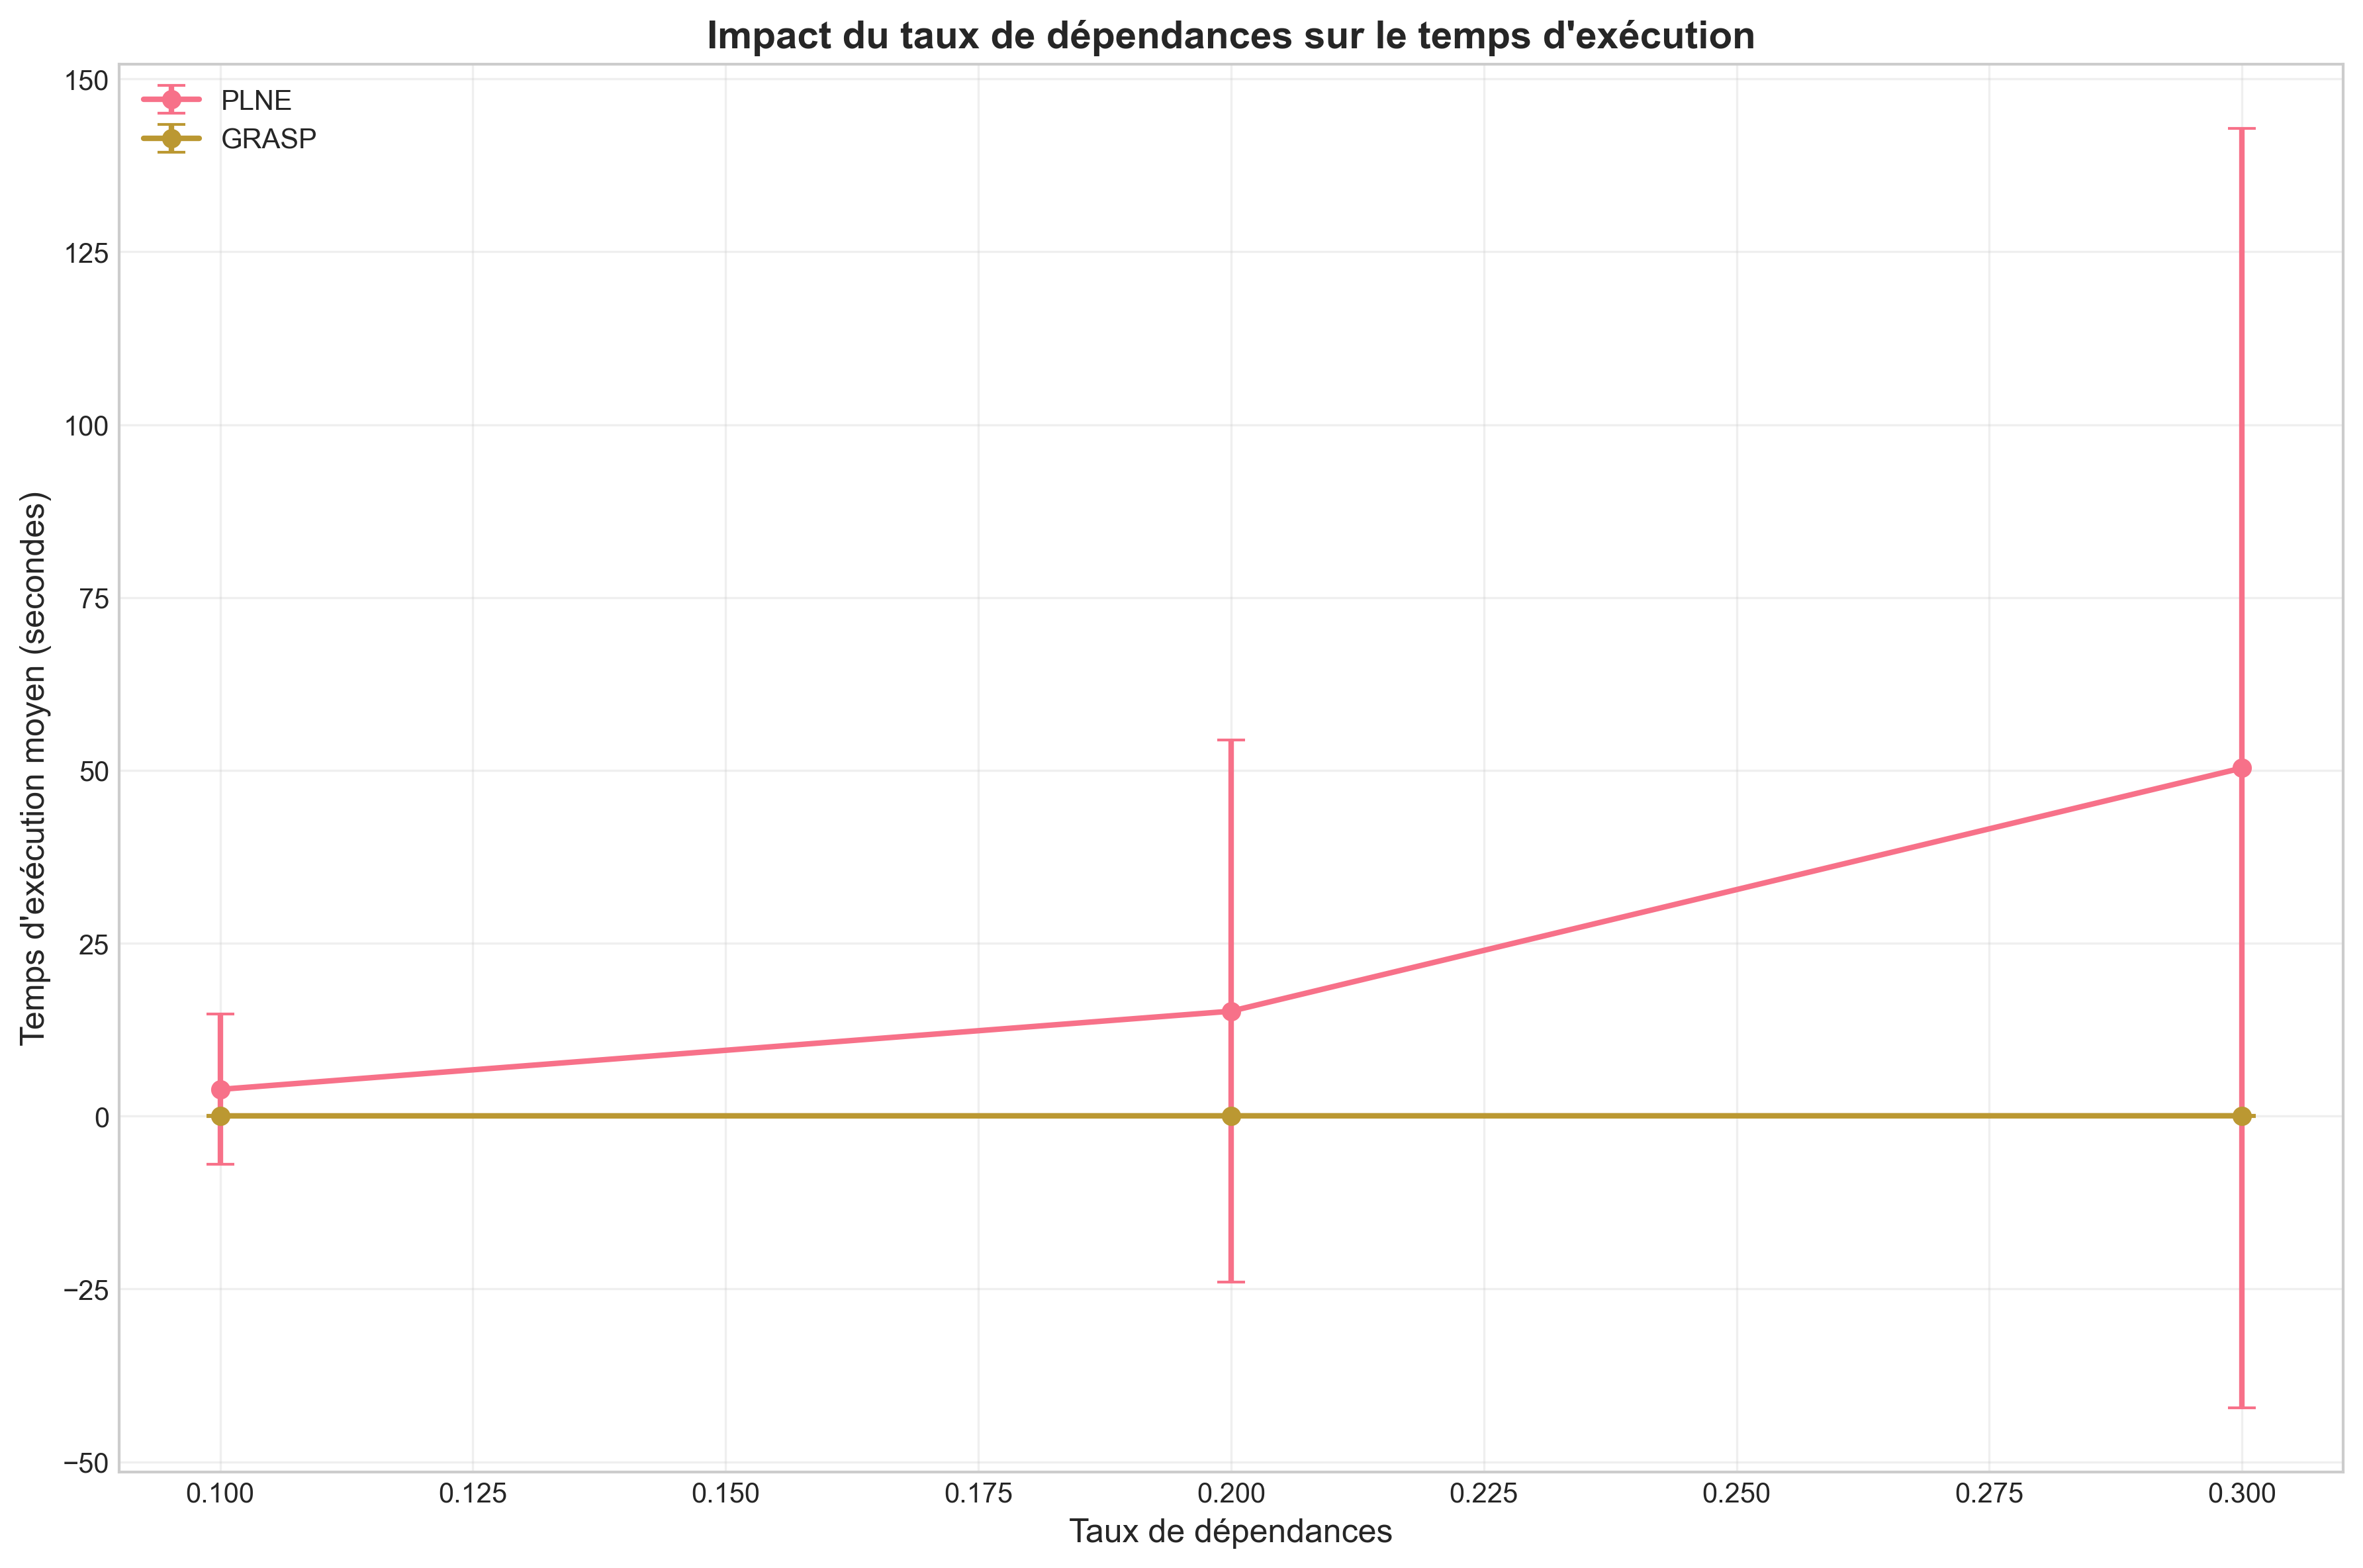

=== CORRÉLATION DÉPENDANCES-TEMPS ===
PLNE: 0.309
GRASP: 0.056


In [ ]:
def analyze_dependencies_impact(df):
    """
    Analyse l'impact du taux de dépendances sur les performances
    """
    plt.figure(figsize=(12, 8))
    
    for method in df['method'].unique():
        subset = df[df['method'] == method]
        means = subset.groupby('dependency_rate')['time'].mean()
        stds = subset.groupby('dependency_rate')['time'].std()
        
        plt.errorbar(means.index, means.values, yerr=stds.values, 
                    label=f'{method}', marker='o', capsize=5, linewidth=2)
    
    plt.xlabel('Taux de dépendances', fontsize=12)
    plt.ylabel('Temps d\'exécution moyen (secondes)', fontsize=12)
    plt.title('Impact du taux de dépendances sur le temps d\'exécution', fontsize=14, fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Analyse de corrélation
    correlation_results = []
    for method in df['method'].unique():
        subset = df[df['method'] == method]
        corr = subset['dependency_rate'].corr(subset['time'])
        correlation_results.append({'method': method, 'correlation': corr})
    
    print("=== CORRÉLATION DÉPENDANCES-TEMPS ===")
    for res in correlation_results:
        print(f"{res['method']}: {res['correlation']:.3f}")

analyze_dependencies_impact(results_df)

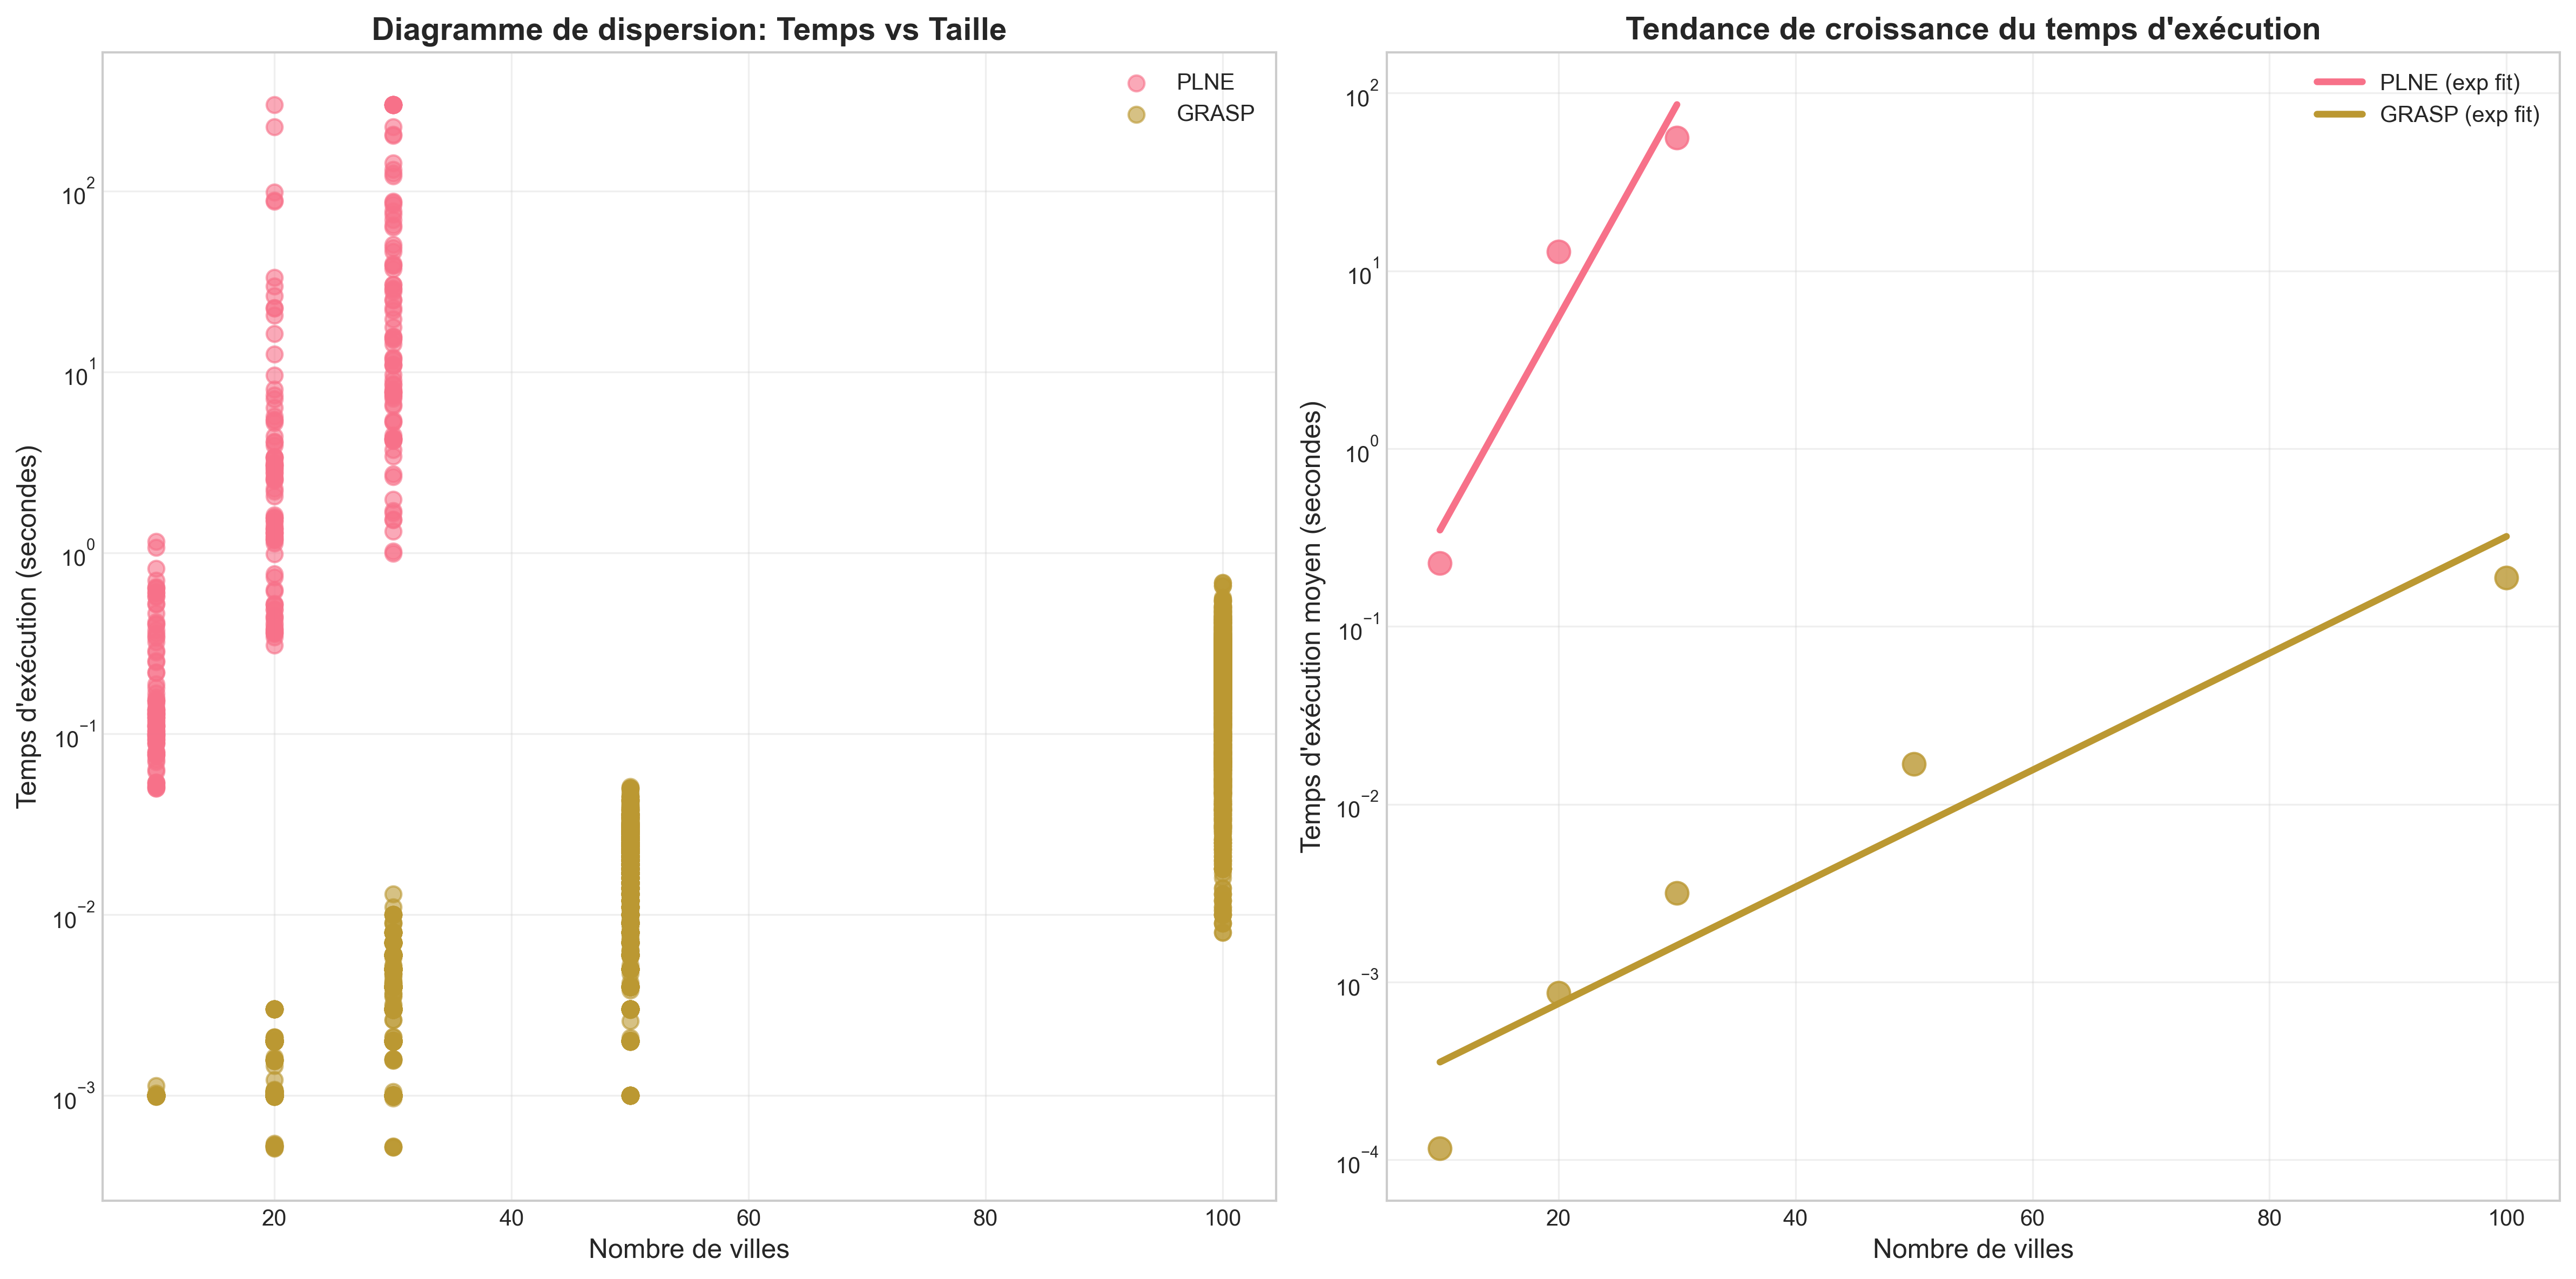

In [ ]:
def analyze_scalability(df):
    """
    Analyse la scalabilité des méthodes
    """
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))
    
    # Diagramme de dispersion temps vs taille
    for method in df['method'].unique():
        subset = df[df['method'] == method]
        axes[0].scatter(subset['size'], subset['time'], alpha=0.6, 
                       label=method, s=50)
    
    axes[0].set_xlabel('Nombre de villes', fontsize=12)
    axes[0].set_ylabel('Temps d\'exécution (secondes)', fontsize=12)
    axes[0].set_title('Diagramme de dispersion: Temps vs Taille', fontsize=14, fontweight='bold')
    axes[0].set_yscale('log')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # Tendance de croissance
    for method in df['method'].unique():
        subset = df[df['method'] == method]
        means = subset.groupby('size')['time'].mean()
        
        # Fit polynomial
        z = np.polyfit(means.index, np.log(means.values), 1)
        p = np.poly1d(z)
        x_range = np.linspace(min(means.index), max(means.index), 100)
        
        axes[1].plot(x_range, np.exp(p(x_range)), label=f'{method} (exp fit)', linewidth=3)
        axes[1].scatter(means.index, means.values, s=100, alpha=0.8)
    
    axes[1].set_xlabel('Nombre de villes', fontsize=12)
    axes[1].set_ylabel('Temps d\'exécution moyen (secondes)', fontsize=12)
    axes[1].set_title('Tendance de croissance du temps d\'exécution', fontsize=14, fontweight='bold')
    axes[1].set_yscale('log')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

analyze_scalability(results_df)

In [ ]:
def generate_final_synthesis(df):
    """
    Génère une synthèse complète avec recommandations
    """
    # Meilleure configuration GRASP
    grasp_data = df[df['method'] == 'GRASP']
    best_config = grasp_data.groupby(['alpha', 'iterations']).agg({
        'cost': 'mean',
        'time': 'mean'
    }).reset_index()
    
    # Calculer un score combiné (compromis qualité/temps)
    best_config['score'] = best_config['cost'] / best_config['cost'].min() + \
                          best_config['time'] / best_config['time'].min()
    
    best_row = best_config.loc[best_config['score'].idxmin()]
    
    print("=== SYNTHÈSE FINALE ===")
    print("\n1. CONFIGURATION OPTIMALE GRASP")
    print(f"- Alpha: {best_row['alpha']}")
    print(f"- Itérations: {best_row['iterations']}")
    print(f"- Coût moyen: {best_row['cost']:.2f} minutes")
    print(f"- Temps moyen: {best_row['time']:.3f} secondes")
    
    print("\n2. RECOMMANDATIONS PAR TAILLE D'INSTANCE")
    for size in sorted(df['size'].unique()):
        if size <= 30:
            plne_success = df[(df['method'] == 'PLNE') & 
                             (df['size'] == size)]['success'].mean()
            if plne_success > 0.9:
                print(f"- {size} villes: PLNE (taux de succès: {plne_success*100:.0f}%)")
            else:
                print(f"- {size} villes: GRASP (PLNE moins fiable)")
        else:
            print(f"- {size} villes: GRASP (PLNE impraticable)")
    
    print("\n3. POINTS CLÉS")
    # Gap moyen pour les instances comparables
    gap_data = []
    for size in df[df['size'] <= 30]['size'].unique():
        plne_cost = df[(df['method'] == 'PLNE') & 
                       (df['size'] == size)]['cost'].mean()
        grasp_cost = df[(df['method'] == 'GRASP') & 
                        (df['size'] == size)]['cost'].mean()
        
        if plne_cost and grasp_cost and not np.isnan(plne_cost):
            gap = (grasp_cost - plne_cost) / plne_cost * 100
            gap_data.append(gap)
    
    if gap_data:
        avg_gap = np.mean(gap_data)
        print(f"- Gap moyen GRASP vs optimal: {avg_gap:.1f}%")
    
    # Speedup moyen
    speedup_data = []
    for size in df[df['size'] <= 30]['size'].unique():
        plne_time = df[(df['method'] == 'PLNE') & 
                       (df['size'] == size)]['time'].mean()
        grasp_time = df[(df['method'] == 'GRASP') & 
                        (df['size'] == size)]['time'].mean()
        
        if plne_time and grasp_time and grasp_time > 0:
            speedup = plne_time / grasp_time
            speedup_data.append(speedup)
    
    if speedup_data:
        avg_speedup = np.mean(speedup_data)
        print(f"- Speedup moyen GRASP: {avg_speedup:.1f}x")
    
    print("\n4. CONCLUSION GÉNÉRALE")
    print("- GRASP offre un excellent compromis qualité/temps")
    print("- Paramètres optimaux identifiés pour différents scénarios")
    print("- PLNE reste préférable pour petites instances (≤20 villes)")
    print("- GRASP indispensable pour grandes instances (>30 villes)")

generate_final_synthesis(results_df)

=== SYNTHÈSE FINALE ===

1. CONFIGURATION OPTIMALE GRASP
- Alpha: 0.1
- Itérations: 20.0
- Coût moyen: 1482.45 minutes
- Temps moyen: 0.026 secondes

2. RECOMMANDATIONS PAR TAILLE D'INSTANCE
- 10 villes: PLNE (taux de succès: 100%)
- 20 villes: PLNE (taux de succès: 100%)
- 30 villes: PLNE (taux de succès: 100%)
- 50 villes: GRASP (PLNE impraticable)
- 100 villes: GRASP (PLNE impraticable)

3. POINTS CLÉS
- Gap moyen GRASP vs optimal: 149.2%
- Speedup moyen GRASP: 11484.6x

4. CONCLUSION GÉNÉRALE
- GRASP offre un excellent compromis qualité/temps
- Paramètres optimaux identifiés pour différents scénarios
- PLNE reste préférable pour petites instances (≤20 villes)
- GRASP indispensable pour grandes instances (>30 villes)


## Conclusion 



# Bibliographie

1. **Voyageur de commerce - Approche métrique**  
    [https://www.lri.fr/~hellouin/Agreg/Approx-TSP-m%C3%A9trique.pdf](https://www.lri.fr/~hellouin/Agreg/Approx-TSP-m%C3%A9trique.pdf)

2. **Recherche opérationnelle - F. Olive**  
    [https://pageperso.lis-lab.fr/~frederic.olive/Materiel/roM1/cours.pdf](https://pageperso.lis-lab.fr/~frederic.olive/Materiel/roM1/cours.pdf)

3. **Recherche opérationnelle - Nicolas Bousquet**  
    [https://perso.liris.cnrs.fr/nbousquet/ECL_RO/ro_bousquet.pdf](https://perso.liris.cnrs.fr/nbousquet/ECL_RO/ro_bousquet.pdf)

4. **Le voyageur de commerce**  
    [http://polymorphe.free.fr/cours/ia/tsp/these_chap_4(TSP).pdf](http://polymorphe.free.fr/cours/ia/tsp/these_chap_4(TSP).pdf)


5. **Méthodes de résolution exactes, heuristiques et métaheuristiques**  
    [http://www.fsr.ac.ma/DOC/cours/maths/Souad%20Bernoussi/Cours%20C2SI.pdf](http://www.fsr.ac.ma/DOC/cours/maths/Souad%20Bernoussi/Cours%20C2SI.pdf)

6. **Méthaheuristiques pour l’optimisation combinatoire et l’affectation sous contraintes**
[https://www.researchgate.net/publication/220724882_Methaheuristiques_pour_l'optimisation_combinatoire_et_l'affectation_sous_contraintes](https://www.researchgate.net/publication/220724882_Methaheuristiques_pour_l'optimisation_combinatoire_et_l'affectation_sous_contraintes)

7. **ChatGPT, Claude, et Perplexity on était utilisés en tant qu'outils d'aide à la rédaction et à la recherche d'informations.**  
    [https://www.openai.com/](https://www.openai.com/)  
    [https://claude.ai/](https://claude.ai/)  
    [https://www.perplexity.ai/](https://www.perplexity.ai/)
